<a href="https://colab.research.google.com/github/TishaJhabak1014/Amazing-Frontend_Templates/blob/main/Analysis_for_summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`

In Australia, the seasons are defined by grouping the calendar months in the following way:

Spring - the three transition months September, October and November.

Summer - the three hottest months December, January and February.

Autumn - the transition months March, April and May.

Winter - the three coldest months June, July and August.

`

In [ ]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/HomeBatterySizing/data/Data_Modification.zip

Archive:  /content/drive/MyDrive/HomeBatterySizing/data/Data_Modification.zip
  inflating: Data_Modification/to_share_2019-01.csv  
  inflating: Data_Modification/to_share_2019-02.csv  
  inflating: Data_Modification/to_share_2019-03.csv  
  inflating: Data_Modification/to_share_2019-04.csv  
  inflating: Data_Modification/to_share_2019-05.csv  
  inflating: Data_Modification/to_share_2019-06.csv  
  inflating: Data_Modification/to_share_2019-07.csv  
  inflating: Data_Modification/to_share_2019-08.csv  
  inflating: Data_Modification/to_share_2019-09.csv  
  inflating: Data_Modification/to_share_2019-10.csv  
  inflating: Data_Modification/to_share_2019-11.csv  
  inflating: Data_Modification/to_share_2019-12.csv  


In [ ]:
#summer
df12 = pd.read_csv("Data_Modification/to_share_2019-12.csv")
df1 = pd.read_csv("/content/drive/MyDrive/HomeBatterySizing/to_share_2019-01.csv")
df2 = pd.read_csv("/content/drive/MyDrive/HomeBatterySizing/to_share_2019-02.csv")

In [ ]:
df12.head()

utc_timestamp  site_id       con_type  energy_(Wh)
0  2019-11-30 13:35:00+00:00   327043     total_load      19.4797
1  2019-11-30 13:35:00+00:00   327043  pv_generation      -0.1942
2  2019-11-30 13:40:00+00:00   327043     total_load      19.4637
3  2019-11-30 13:40:00+00:00   327043  pv_generation      -0.1952
4  2019-11-30 13:45:00+00:00   327043     total_load      25.3584

In [ ]:
df12.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069214 entries, 0 to 9069213
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   utc_timestamp  object 
 1   site_id        int64  
 2   con_type       object 
 3   energy_(Wh)    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 276.8+ MB


In [ ]:
dfs = [df12, df1, df2]

In [ ]:
for df in dfs:
  print(df.head(1))

               utc_timestamp  site_id    con_type  energy_(Wh)
0  2019-11-30 13:35:00+00:00   327043  total_load      19.4797
               utc_timestamp  site_id    con_type  energy_(Wh)
0  2018-12-31 13:35:00+00:00   327043  total_load      65.7584
               utc_timestamp  site_id    con_type  energy_(Wh)
0  2019-01-31 13:35:00+00:00   327043  total_load      68.1855


In [ ]:
for df in dfs:
  print(df.shape)

(9069214, 4)
(9052628, 4)
(8176746, 4)


In [ ]:
for df in dfs:
  print(df['site_id'].nunique())

508
507
507


In [ ]:
x = [ id for id in dfs[0]['site_id'].unique() if id not in dfs[1]['site_id'].unique()]

In [ ]:
x

[1032790657]

In [ ]:
test_household_from_summer = dfs[0][dfs[0]['site_id'] == 1032790657]

In [ ]:
test_household_from_summer.append([dfs[1][dfs[1]['site_id'] == 1032790657], dfs[2][dfs[2]['site_id'] == 1032790657]], ignore_index=True)

utc_timestamp     site_id       con_type  energy_(Wh)
0      2019-11-30 13:05:00+00:00  1032790657     total_load      11.5664
1      2019-11-30 13:05:00+00:00  1032790657  pv_generation      11.4447
2      2019-11-30 13:10:00+00:00  1032790657     total_load      11.4331
3      2019-11-30 13:10:00+00:00  1032790657  pv_generation      11.4856
4      2019-11-30 13:15:00+00:00  1032790657     total_load       4.9894
...                          ...         ...            ...          ...
17851  2019-12-31 12:50:00+00:00  1032790657  pv_generation      14.2500
17852  2019-12-31 12:55:00+00:00  1032790657     total_load      14.0525
17853  2019-12-31 12:55:00+00:00  1032790657  pv_generation      14.2297
17854  2019-12-31 13:00:00+00:00  1032790657     total_load      14.0512
17855  2019-12-31 13:00:00+00:00  1032790657  pv_generation      14.2281

[17856 rows x 4 columns]

In [ ]:
def data_processing(ori_data):
    data = ori_data.copy()
    data.drop(data[data.site_id ==1032790657].index, inplace=True)
    data['energy(W)'] = data['energy_(Wh)'] * 12
    total_load = data['energy(W)'][data['con_type'] == 'total_load'].reset_index(drop=True)
    pv_generation = data['energy(W)'][data['con_type'] == 'pv_generation'].reset_index(drop=True)
    data_new = data.iloc[1::2][['utc_timestamp','site_id']].reset_index(drop=True)
    data_new = pd.concat([data_new, pv_generation, total_load], axis = 1)
    data_new['utc_timestamp'] = pd.to_datetime(data_new['utc_timestamp'], format = '%Y-%m-%d %H:%M:%S')
    data_new.columns = ['utc_timestamp', 'site_id', 'pv_generation(W)' , 'total_load(W)']

    data_new['pv_generation(W)'][data_new['pv_generation(W)'] < 0] = 0
    data_new['total_load(W)'][data_new['total_load(W)'] < 0] = 0
    
    return data_new

In [ ]:
dfs_pv_load = []
for df in dfs:
  dfs_pv_load.append(data_processing(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
dfs_pv_load[0]

utc_timestamp     site_id  pv_generation(W)  total_load(W)
0       2019-11-30 13:35:00+00:00      327043            0.0000       233.7564
1       2019-11-30 13:40:00+00:00      327043            0.0000       233.5644
2       2019-11-30 13:45:00+00:00      327043            0.0000       304.3008
3       2019-11-30 13:50:00+00:00      327043            0.0000       441.5424
4       2019-11-30 13:55:00+00:00      327043            0.0000       426.1356
...                           ...         ...               ...            ...
4525674 2019-12-31 13:40:00+00:00  2138660056            0.3672       276.6768
4525675 2019-12-31 13:45:00+00:00  2138660056            0.5832       409.6728
4525676 2019-12-31 13:50:00+00:00  2138660056            0.5328       513.0060
4525677 2019-12-31 13:55:00+00:00  2138660056            0.5100       477.8964
4525678 2019-12-31 14:00:00+00:00  2138660056            0.6072       547.3776

[4525679 rows x 4 columns]

In [ ]:
for df in dfs:
  print(df.shape[0] // 2)

print("-----")

for i in range(3):
  print(dfs_pv_load[i].shape[0]+ dfs[i][dfs[i]['site_id'] == 1032790657].shape[0]//2)

4534607
4526314
4088373
-----
4534607
4526314
4088373


In [ ]:
for df in dfs_pv_load:
  print(df.describe())

            site_id  pv_generation(W)  total_load(W)
count  4.525679e+06      4.525679e+06   4.525679e+06
mean   1.091234e+09      1.151575e+03   9.890708e+02
std    6.062821e+08      1.758913e+03   1.505515e+03
min    3.270430e+05      0.000000e+00   0.000000e+00
25%    5.719264e+08      0.000000e+00   2.274108e+02
50%    1.093415e+09      1.817064e+02   4.536324e+02
75%    1.644198e+09      2.027117e+03   1.120756e+03
max    2.138660e+09      4.475360e+04   4.779542e+04
            site_id  pv_generation(W)  total_load(W)
count  4.526314e+06      4.526314e+06   4.526314e+06
mean   1.091117e+09      1.149680e+03   1.061290e+03
std    6.063225e+08      1.832974e+03   1.746715e+03
min    3.270430e+05      0.000000e+00   0.000000e+00
25%    5.719264e+08      0.000000e+00   2.434608e+02
50%    1.093415e+09      1.452336e+02   4.849102e+02
75%    1.644198e+09      1.998922e+03   1.214755e+03
max    2.138660e+09      4.865884e+04   4.937690e+04
            site_id  pv_generation(W)  total_l

`Handling Time`

In [ ]:
df_site_details = pd.read_excel('/content/drive/MyDrive/HomeBatterySizing/site_details_USYD_202010.xlsx')

In [ ]:
print(df_site_details)

        site_id       timezone_id state  postcode
0     108816659  Australia/Darwin    NT       810
1    1061497183  Australia/Darwin    NT       832
2    1285868367  Australia/Sydney   NSW      2022
3    2001842041  Australia/Sydney   NSW      2038
4    1987799347  Australia/Sydney   NSW      2038
..          ...               ...   ...       ...
505   275966411  Australia/Hobart   TAS      7250
506  1061037957  Australia/Hobart   TAS      7300
507   406400077  Australia/Hobart   TAS      7300
508   876076654  Australia/Hobart   TAS      7321
509  1833385967  Australia/Hobart   TAS      7467

[510 rows x 4 columns]


In [ ]:
def time_formatting(data):
    data = pd.merge(data, df_site_details[['site_id','timezone_id']])
    data['utc_timestamp'] = data['utc_timestamp'].dt.tz_convert(data.timezone_id.values[0])
    return data

In [ ]:
for df in dfs_pv_load:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525679 entries, 0 to 4525678
Data columns (total 4 columns):
 #   Column            Dtype              
---  ------            -----              
 0   utc_timestamp     datetime64[ns, UTC]
 1   site_id           int64              
 2   pv_generation(W)  float64            
 3   total_load(W)     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 138.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526314 entries, 0 to 4526313
Data columns (total 4 columns):
 #   Column            Dtype              
---  ------            -----              
 0   utc_timestamp     datetime64[ns, UTC]
 1   site_id           int64              
 2   pv_generation(W)  float64            
 3   total_load(W)     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 138.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088373 entries, 0 to 4088372
Data columns (tota

In [ ]:
df_december, df_january, df_february = dfs_pv_load

In [ ]:
df_january.head()

utc_timestamp  site_id  pv_generation(W)  total_load(W)
0 2018-12-31 13:35:00+00:00   327043               0.0       789.1008
1 2018-12-31 13:40:00+00:00   327043               0.0       598.6728
2 2018-12-31 13:45:00+00:00   327043               0.0       875.5236
3 2018-12-31 13:50:00+00:00   327043               0.0       504.5496
4 2018-12-31 13:55:00+00:00   327043               0.0       751.0728

In [ ]:
households_december = df_december.groupby('site_id')
households_january = df_january.groupby('site_id')
households_february = df_february.groupby('site_id')

Groupby

In [ ]:
summer_data = df_december.append([df_january,df_february], ignore_index=True )

In [ ]:
summer_data

utc_timestamp     site_id  pv_generation(W)  \
0        2019-11-30 13:35:00+00:00      327043            0.0000   
1        2019-11-30 13:40:00+00:00      327043            0.0000   
2        2019-11-30 13:45:00+00:00      327043            0.0000   
3        2019-11-30 13:50:00+00:00      327043            0.0000   
4        2019-11-30 13:55:00+00:00      327043            0.0000   
...                            ...         ...               ...   
13140361 2019-02-28 13:40:00+00:00  2138660056            0.6168   
13140362 2019-02-28 13:45:00+00:00  2138660056            0.5664   
13140363 2019-02-28 13:50:00+00:00  2138660056            0.6396   
13140364 2019-02-28 13:55:00+00:00  2138660056            0.8268   
13140365 2019-02-28 14:00:00+00:00  2138660056            0.8268   

          total_load(W)  
0              233.7564  
1              233.5644  
2              304.3008  
3              441.5424  
4              426.1356  
...                 ...  
13140361       515.4936  
13140362       486.8736  
13140363       526.2828  
13140364       638.9904  
13140365       635.2200  

[13140366 rows x 4 columns]

In [ ]:
summer_data.shape[0] == (df_february.shape[0] + df_december.shape[0] + df_january.shape[0])

True

In [ ]:
summer_households = summer_data.groupby('site_id')

In [ ]:
len(summer_households)

507

In [ ]:
summer_households_list = []
for site_id, house in summer_households:
  house = time_formatting(house)
  house['time'] = house['utc_timestamp'].dt.time
  house['date'] = house['utc_timestamp'].dt.date

  summer_households_list.append(house)

In [ ]:
for site_id, house in summer_households:
  print(len(house), end=', ')

25920, 25920, 25920, 25732, 25920, 25920, 25920, 25920, 25920, 25919, 25919, 25920, 25920, 25920, 25826, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25919, 25920, 25920, 25920, 25917, 25920, 25920, 25903, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25919, 25920, 25920, 25920, 25920, 25914, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25588, 25920, 25920, 25920, 25920, 25920, 25919, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25874, 25920, 25920, 25920, 25919, 25920, 25920, 25920, 25919, 25919, 25920, 25920, 25920, 25920, 25918, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25794, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920, 25920,

In [ ]:
summer_households_list[1].head(5)

utc_timestamp  site_id  pv_generation(W)  total_load(W)  \
0 2019-12-01 00:05:00+10:30  6005316            4.6464        32.5668   
1 2019-12-01 00:10:00+10:30  6005316            4.6128        31.9992   
2 2019-12-01 00:15:00+10:30  6005316            4.5864        31.6800   
3 2019-12-01 00:20:00+10:30  6005316            4.5972        32.0172   
4 2019-12-01 00:25:00+10:30  6005316            4.5804        31.9032   

          timezone_id      time        date  
0  Australia/Adelaide  00:05:00  2019-12-01  
1  Australia/Adelaide  00:10:00  2019-12-01  
2  Australia/Adelaide  00:15:00  2019-12-01  
3  Australia/Adelaide  00:20:00  2019-12-01  
4  Australia/Adelaide  00:25:00  2019-12-01

In [ ]:
len(summer_households_list)

507

In [ ]:
summer_households_list[506]['time'].nunique()

288

In [ ]:
count = 0
for i in range(507):

  if summer_households_list[i]['time'].nunique() != 288:
    print("Shit")
    break
  count+=1


In [ ]:
count

507

In [ ]:
xyz= summer_households_list[0]['time'].unique()

count = 0
for i in range(507):

  if (summer_households_list[i]['time'].unique() != xyz).all():
    print("Shit")
    break
  count+=1

count

507

In [ ]:
cols = []
for x in summer_households_list[0]['time'].unique():
  cols.append(x.strftime("%H:%M:%S"))

print(cols)
print(len(cols))

['00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00', '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00', '00:55:00', '01:00:00', '01:05:00', '01:10:00', '01:15:00', '01:20:00', '01:25:00', '01:30:00', '01:35:00', '01:40:00', '01:45:00', '01:50:00', '01:55:00', '02:00:00', '02:05:00', '02:10:00', '02:15:00', '02:20:00', '02:25:00', '02:30:00', '02:35:00', '02:40:00', '02:45:00', '02:50:00', '02:55:00', '03:00:00', '03:05:00', '03:10:00', '03:15:00', '03:20:00', '03:25:00', '03:30:00', '03:35:00', '03:40:00', '03:45:00', '03:50:00', '03:55:00', '04:00:00', '04:05:00', '04:10:00', '04:15:00', '04:20:00', '04:25:00', '04:30:00', '04:35:00', '04:40:00', '04:45:00', '04:50:00', '04:55:00', '05:00:00', '05:05:00', '05:10:00', '05:15:00', '05:20:00', '05:25:00', '05:30:00', '05:35:00', '05:40:00', '05:45:00', '05:50:00', '05:55:00', '06:00:00', '06:05:00', '06:10:00', '06:15:00', '06:20:00', '06:25:00', '06:30:00', '06:35:00', '06:40:00', '06:45:00', '06:50:00', '06:55:00', '07

In [ ]:
count = 0
for id, house in summer_households:
  count+=1
count

507

In [ ]:
unique_ids = [id for id, house in summer_households]

In [ ]:
print(unique_ids)
print(len(unique_ids))

[327043, 6005316, 12054066, 19581418, 24931494, 29602116, 31551596, 40704780, 44670684, 46457498, 72185998, 86780673, 94945725, 98921348, 103401566, 104625735, 108816659, 108943661, 110036971, 111011284, 118662027, 119057014, 122229845, 122868314, 128385117, 137063397, 140930757, 141393587, 144198244, 149617518, 151114796, 152786204, 160669105, 169704016, 179250727, 181948637, 190468730, 201634828, 209505494, 210042273, 212955555, 220263763, 223489310, 228898826, 243853119, 246327360, 250071077, 252956890, 253980921, 257847471, 258995145, 261868923, 263534978, 269185004, 269311982, 275966411, 280696729, 287141161, 289382707, 294563806, 298248096, 304613766, 309568343, 313374782, 321774035, 323612062, 323793566, 327231844, 327993191, 330405493, 331786573, 332936487, 341281495, 352610646, 354449532, 364517646, 368133844, 371655602, 372229050, 374422113, 380452945, 382146350, 384144702, 384669246, 385989372, 387074283, 388973326, 397315754, 401225851, 406400077, 410078745, 414226922, 4227

In [ ]:
def means_across_timestamps(collection): # takes data grouped by sites
  mean_total_load_across_timestamps_matrix = []
  mean_pv_generation_across_timestamps_matrix = []

  
  for id, house in collection:
    house = time_formatting(house)
    house['time'] = house['utc_timestamp'].dt.time
    house['date'] = house['utc_timestamp'].dt.date

    by_time = house.groupby('time')
    pv_generation_mean_by_time = []
    load_mean_by_time = []

    for i,time in by_time:
      load_mean_by_time.append(round(time['total_load(W)'].mean(), 4))
      pv_generation_mean_by_time.append(round(time['pv_generation(W)'].mean(), 4))
    mean_total_load_across_timestamps_matrix.append(load_mean_by_time)
    mean_pv_generation_across_timestamps_matrix.append(pv_generation_mean_by_time)
    
  return mean_total_load_across_timestamps_matrix, mean_pv_generation_across_timestamps_matrix

def data_across_sites(collection): # takes data grouped by sites

  a, b = means_across_timestamps(collection)
  final_data_for_load = pd.DataFrame(np.array(a), columns=cols[:])
  final_data_for_load.insert(0, 'site_id', unique_ids)

  final_data_for_gen = pd.DataFrame(np.array(b), columns=cols[:])
  final_data_for_gen.insert(0, 'site_id', unique_ids)
  return final_data_for_load, final_data_for_gen

In [ ]:
df_load , df_gen = data_across_sites(summer_households)

In [ ]:
df_load

site_id   00:05:00   00:10:00   00:15:00   00:20:00   00:25:00  \
0        327043  1382.9099  1343.8001  1303.5275  1291.2223  1220.3007   
1       6005316   121.6151   111.6744   110.9566   100.5409    90.2363   
2      12054066   150.7609   136.6231   115.9901   111.5395   104.2882   
3      19581418   334.8752   307.1225   297.8626   309.6823   289.3778   
4      24931494   372.4306   336.0110   339.2272   322.1579   301.1045   
..          ...        ...        ...        ...        ...        ...   
502  2121566623   218.3921   209.6831   201.2516   195.6184   198.7481   
503  2123601246   228.4570   230.6817   224.6766   221.0915   218.3766   
504  2126348649   296.4223   276.0154   257.1565   244.4464   233.8400   
505  2132171512   281.7056   293.6251   284.0100   288.2869   278.3754   
506  2138660056   600.6237   607.5343   616.6785   609.7013   588.2551   

      00:30:00   00:35:00   00:40:00   00:45:00  ...   23:15:00   23:20:00  \
0    1215.6833  1188.0269  1176.4053  1185.6067  ...  1628.8010  1597.7319   
1      91.7951    85.9837    86.0394    92.6204  ...   181.6427   178.0399   
2     109.6650   104.0039   109.1105   119.4859  ...   137.2045   125.1467   
3     282.7682   296.5430   284.8053   266.4286  ...   367.1281   349.1848   
4     301.1447   312.6922   301.8215   289.7818  ...   576.1840   577.4490   
..         ...        ...        ...        ...  ...        ...        ...   
502   204.0868   205.9257   207.1431   208.3547  ...   245.7920   234.1027   
503   217.8806   213.5349   194.5935   186.0824  ...   282.2439   314.2192   
504   222.4831   226.0791   226.7516   233.2941  ...   379.8709   337.0453   
505   275.9624   260.8631   265.8905   254.2846  ...   472.5403   466.1886   
506   586.4746   579.3775   585.8851   578.8628  ...   652.3619   644.8579   

      23:25:00   23:30:00   23:35:00   23:40:00   23:45:00   23:50:00  \
0    1568.9542  1531.7972  1547.3300  1507.9957  1497.4277  1433.7615   
1     169.0995   157.8863   154.8390   153.5028   156.0366   148.4336   
2     120.7603   118.5719   114.4337   120.7694   117.2034   113.4687   
3     313.8457   310.3704   314.3907   311.4774   327.8386   336.4430   
4     570.9240   539.8267   507.3531   474.8739   447.9130   439.4614   
..         ...        ...        ...        ...        ...        ...   
502   224.7932   228.5329   216.3811   212.7180   209.4441   213.3194   
503   297.8823   297.9980   255.2587   252.4823   249.4168   269.1447   
504   316.1277   341.9380   353.1342   347.6459   308.1636   281.0430   
505   464.3828   476.1980   487.2312   477.2375   441.7935   371.9558   
506   630.6361   627.9953   634.9955   646.1748   641.5981   621.7139   

      23:55:00   00:00:00  
0    1408.3870  1390.2750  
1     135.1893   122.0009  
2     112.9471   131.9668  
3     337.1450   354.6167  
4     425.8717   393.6957  
..         ...        ...  
502   217.0052   221.2543  
503   262.8622   228.0941  
504   289.0387   286.5124  
505   322.1583   292.5636  
506   620.5285   620.2621  

[507 rows x 289 columns]

In [ ]:
df_gen

site_id  00:05:00  00:10:00  00:15:00  00:20:00  00:25:00  00:30:00  \
0        327043    0.0000    0.0000    0.0000    0.0000    0.0019    0.0000   
1       6005316    2.5732    2.6642    2.9089    2.8749    2.8603    3.0558   
2      12054066    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
3      19581418    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
4      24931494    0.1780    0.1924    0.1834    0.1855    0.1922    0.1935   
..          ...       ...       ...       ...       ...       ...       ...   
502  2121566623    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
503  2123601246    0.5609    0.5715    0.5578    0.5517    0.5452    0.5442   
504  2126348649    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
505  2132171512    2.6945    2.6922    2.6872    2.6808    2.6900    2.6883   
506  2138660056    0.7256    0.7150    0.7353    0.7386    0.7083    0.7117   

     00:35:00  00:40:00  00:45:00  ...  23:15:00  23:20:00  23:25:00  \
0      0.0000    0.0016    0.0000  ...    0.0031    0.0038    0.0064   
1      2.8981    2.3639    2.0159  ...    0.0000    0.0000    0.0000   
2      0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000   
3      0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000   
4      0.1901    0.1983    0.2008  ...    0.1445    0.1489    0.1485   
..        ...       ...       ...  ...       ...       ...       ...   
502    0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000   
503    0.5343    0.4800    0.4545  ...    0.6997    0.7788    0.7416   
504    0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000   
505    2.6953    2.6945    2.6996  ...    2.6245    2.6279    2.6298   
506    0.7030    0.7143    0.7116  ...    0.7940    0.7760    0.7617   

     23:30:00  23:35:00  23:40:00  23:45:00  23:50:00  23:55:00  00:00:00  
0      0.0004    0.0011    0.0000    0.0000    0.0000    0.0000    0.0000  
1      0.0000    0.2285    0.6135    1.0131    1.4532    1.8377    2.2218  
2      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
3      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
4      0.1520    0.1537    0.1585    0.1654    0.1630    0.1650    0.1720  
..        ...       ...       ...       ...       ...       ...       ...  
502    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
503    0.7470    0.6338    0.6281    0.6148    0.6599    0.6481    0.5618  
504    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
505    2.6231    2.6166    2.6173    2.6340    2.6673    2.6870    2.6953  
506    0.7651    0.7718    0.7899    0.7829    0.7561    0.7533    0.7577  

[507 rows x 289 columns]

# Data Vizualization

In [ ]:
global img_count 
img_count = 0

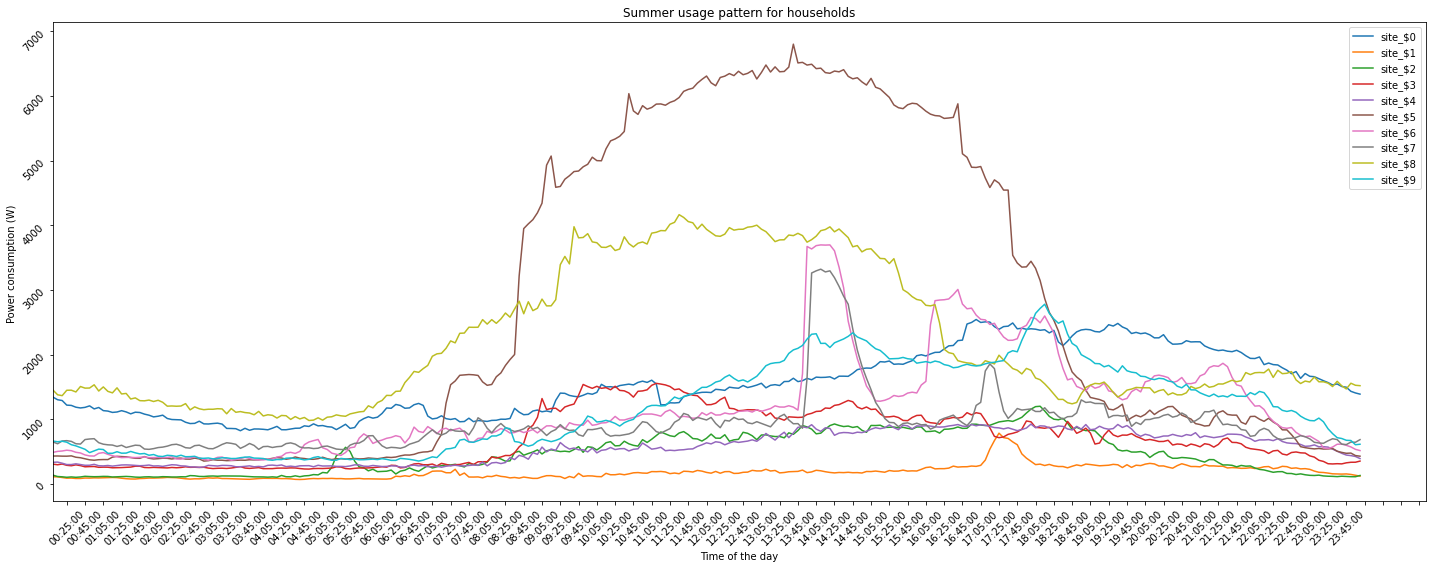

In [ ]:
import matplotlib.ticker as mticker
myLocator =mticker.MultipleLocator(4)

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] =  True
for i in range(10):
  ax = sns.lineplot(x=cols[:], y = df_load.iloc[i][1:], label=f'site_${i}')
  ax.tick_params(rotation=45)
  ax.set_xmargin(10)
  ax.xaxis.set_major_locator(myLocator)
  ax.set_xlim(xmin=cols[1:][0])

ax.set(xlabel="Time of the day", ylabel="Power consumption (W) ", title="Summer usage pattern for households")
plt.legend()
plt.savefig(f"summer{img_count}.png")
plt.show()

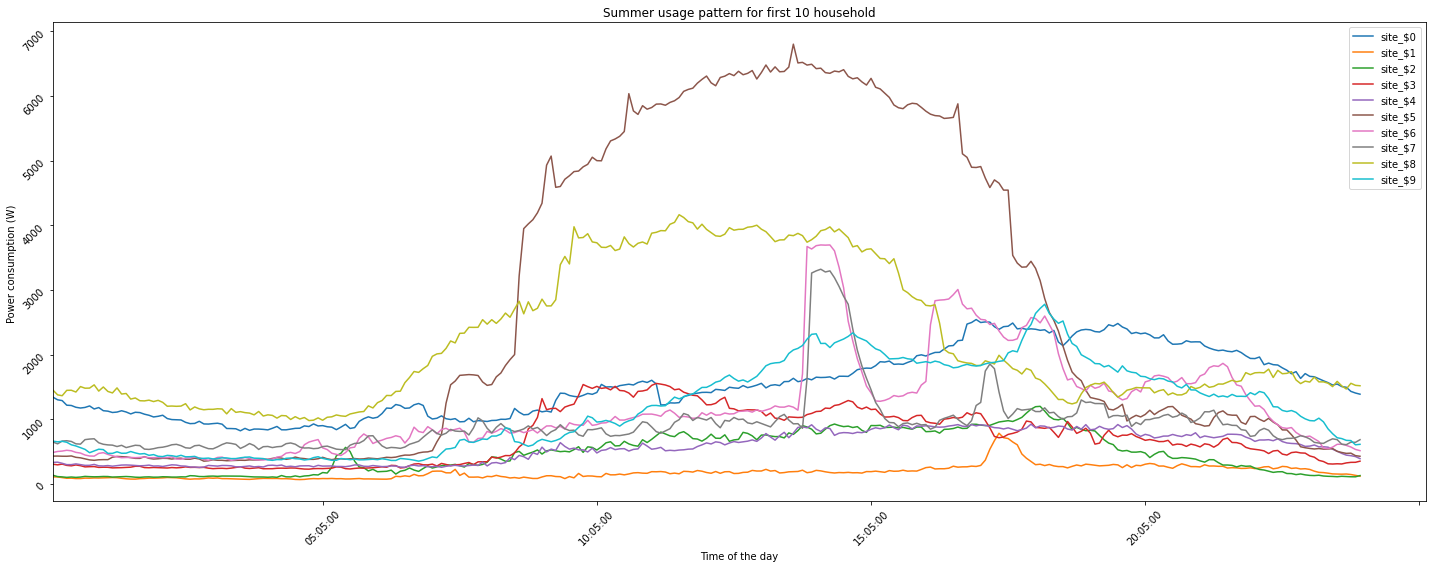

In [ ]:
hourLocator =mticker.MultipleLocator(5*12)

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] =  True
for i in range(10):
  ax = sns.lineplot(x=cols[:], y = df_load.iloc[i][1:], label=f'site_${i}')
  ax.tick_params(rotation=45)
  ax.set_xmargin(10)
  ax.xaxis.set_major_locator(hourLocator)
  ax.set_xlim(xmin=cols[1:][0])
ax.set(xlabel="Time of the day", ylabel="Power consumption (W) ", title="Summer usage pattern for first 10 household")
img_count+=1
plt.savefig(f"summer{img_count}.png")
plt.show()

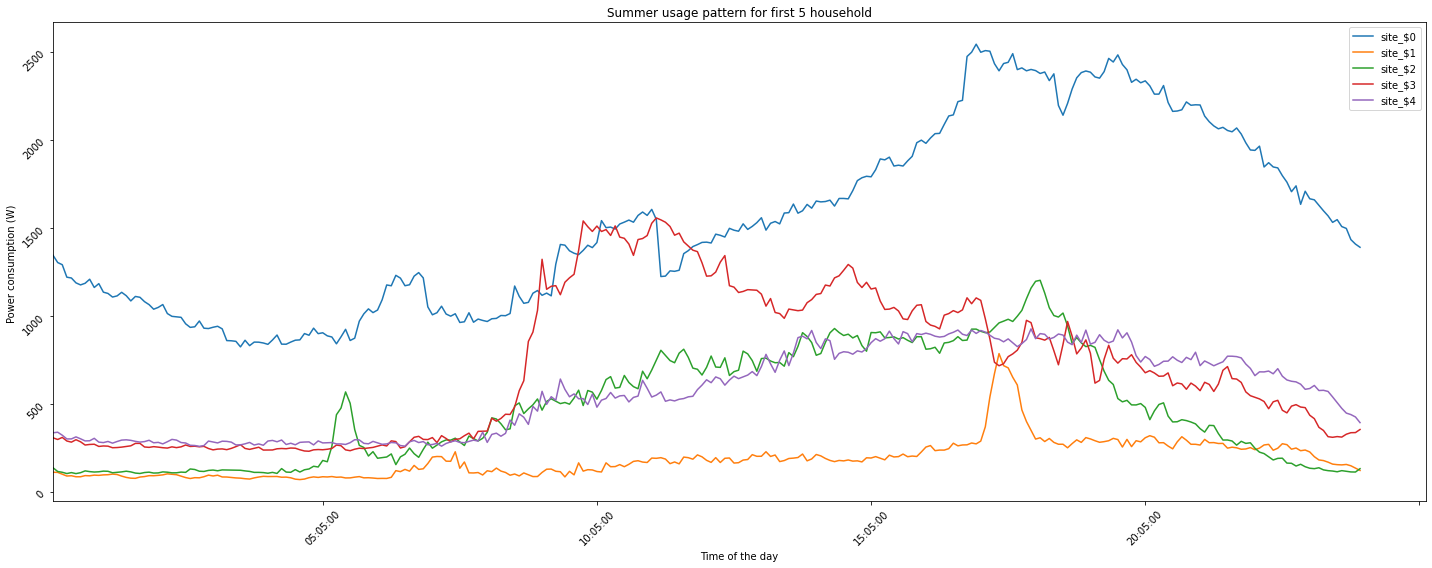

In [ ]:
hourLocator =mticker.MultipleLocator(5*12)

plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] =  True
for i in range(5):
  ax = sns.lineplot(x=cols[:], y = df_load.iloc[i][1:], label=f'site_${i}')
  ax.tick_params(rotation=45)
  ax.set_xmargin(10)
  ax.xaxis.set_major_locator(hourLocator)
  ax.set_xlim(xmin=cols[1:][0])
ax.set(xlabel="Time of the day", ylabel="Power consumption (W) ", title="Summer usage pattern for first 5 household")
img_count+=1
plt.savefig(f"summer{img_count}.png")
plt.show()

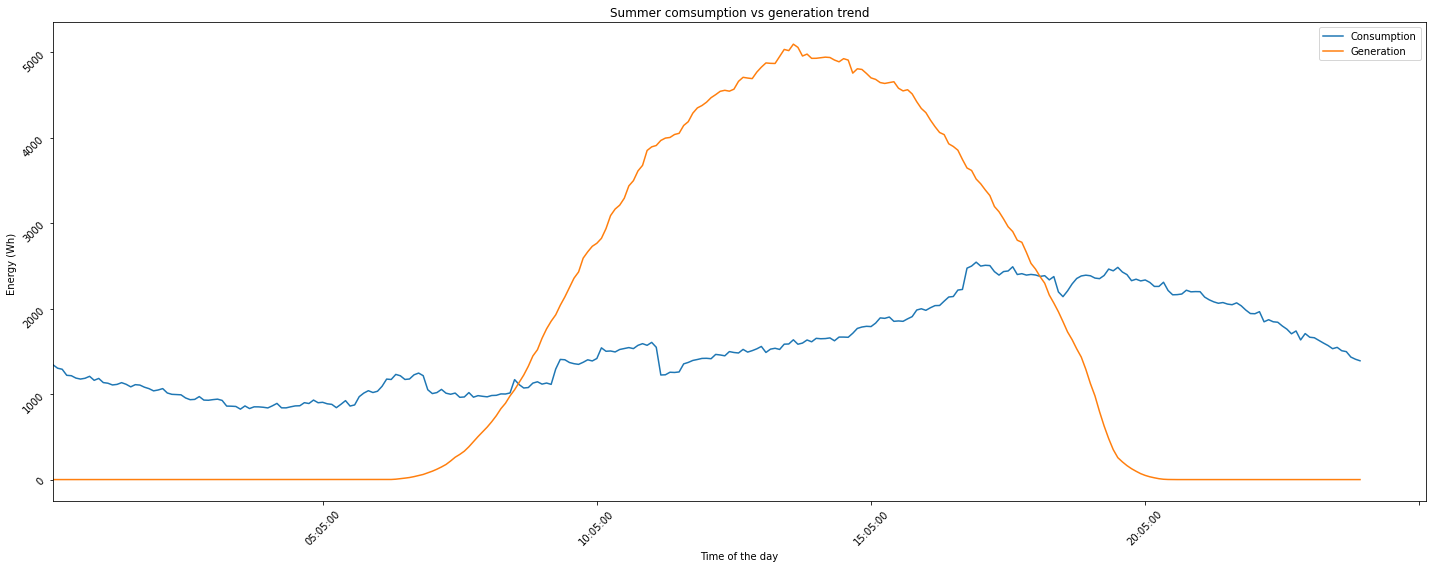

In [ ]:
for i in range(1):
  ax = sns.lineplot(x=cols[:], y = df_load.iloc[i][1:], label="Consumption")
  ax = sns.lineplot(x=cols[:], y = df_gen.iloc[i][1:], label="Generation")
  ax.tick_params(rotation=45)
  ax.xaxis.set_major_locator(hourLocator)
  ax.set_xlim(xmin=cols[1:][0])
ax.set(xlabel="Time of the day", ylabel="Energy (Wh) ", title="Summer comsumption vs generation trend")
plt.legend()
img_count+=1
plt.savefig(f"summer{img_count}.png")
plt.show()

In [ ]:
df_load.to_csv('load_df_for_summer.csv', index=False)
df_gen.to_csv('gen_df_for_summer.csv', index=False)

In [ ]:
gfc = pd.read_csv("/content/gen_df_for_summer.csv")

In [ ]:
gfc.head()

site_id  00:05:00  00:10:00  00:15:00  00:20:00  00:25:00  00:30:00  \
0    327043    0.0000    0.0000    0.0000    0.0000    0.0019    0.0000   
1   6005316    2.5732    2.6642    2.9089    2.8749    2.8603    3.0558   
2  12054066    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
3  19581418    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
4  24931494    0.1780    0.1924    0.1834    0.1855    0.1922    0.1935   

   00:35:00  00:40:00  00:45:00  ...  23:15:00  23:20:00  23:25:00  23:30:00  \
0    0.0000    0.0016    0.0000  ...    0.0031    0.0038    0.0064    0.0004   
1    2.8981    2.3639    2.0159  ...    0.0000    0.0000    0.0000    0.0000   
2    0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000    0.0000   
3    0.0000    0.0000    0.0000  ...    0.0000    0.0000    0.0000    0.0000   
4    0.1901    0.1983    0.2008  ...    0.1445    0.1489    0.1485    0.1520   

   23:35:00  23:40:00  23:45:00  23:50:00  23:55:00  00:00:00  
0    0.0011    0.0000    0.0000    0.0000    0.0000    0.0000  
1    0.2285    0.6135    1.0131    1.4532    1.8377    2.2218  
2    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
3    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  
4    0.1537    0.1585    0.1654    0.1630    0.1650    0.1720  

[5 rows x 289 columns]

# Clustering damand profiles for Summer

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 


In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=dc23500d138ba535c3d8b97e0b49abc30a362b2249607de6f6ca02347bb83039
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
df_load.head()

site_id   00:05:00   00:10:00   00:15:00   00:20:00   00:25:00   00:30:00  \
0    327043  1382.9099  1343.8001  1303.5275  1291.2223  1220.3007  1215.6833   
1   6005316   121.6151   111.6744   110.9566   100.5409    90.2363    91.7951   
2  12054066   150.7609   136.6231   115.9901   111.5395   104.2882   109.6650   
3  19581418   334.8752   307.1225   297.8626   309.6823   289.3778   282.7682   
4  24931494   372.4306   336.0110   339.2272   322.1579   301.1045   301.1447   

    00:35:00   00:40:00   00:45:00  ...   23:15:00   23:20:00   23:25:00  \
0  1188.0269  1176.4053  1185.6067  ...  1628.8010  1597.7319  1568.9542   
1    85.9837    86.0394    92.6204  ...   181.6427   178.0399   169.0995   
2   104.0039   109.1105   119.4859  ...   137.2045   125.1467   120.7603   
3   296.5430   284.8053   266.4286  ...   367.1281   349.1848   313.8457   
4   312.6922   301.8215   289.7818  ...   576.1840   577.4490   570.9240   

    23:30:00   23:35:00   23:40:00   23:45:00   23:50:00   23:55:00   00:00:00  
0  1531.7972  1547.3300  1507.9957  1497.4277  1433.7615  1408.3870  1390.2750  
1   157.8863   154.8390   153.5028   156.0366   148.4336   135.1893   122.0009  
2   118.5719   114.4337   120.7694   117.2034   113.4687   112.9471   131.9668  
3   310.3704   314.3907   311.4774   327.8386   336.4430   337.1450   354.6167  
4   539.8267   507.3531   474.8739   447.9130   439.4614   425.8717   393.6957  

[5 rows x 289 columns]

In [ ]:
def generate_data_for_clustering_profiles(data):
  df_january_for_clustering = data.transpose()
  df_january_for_clustering.columns = unique_ids
  df_january_for_clustering.drop('site_id', inplace =True)
  df_january_for_clustering.index.name = 'date'

  mySeries = []
  for id in df_january_for_clustering.columns:
    mySeries.append(df_january_for_clustering[id])
  return df_january_for_clustering, mySeries

In [ ]:
df_load_to_cluster, mySeries = generate_data_for_clustering_profiles(df_load)

In [ ]:
df_load_to_cluster.head()

327043      6005316     12054066    19581418    24931494    \
date                                                                   
00:05:00   1382.9099    121.6151    150.7609    334.8752    372.4306   
00:10:00   1343.8001    111.6744    136.6231    307.1225    336.0110   
00:15:00   1303.5275    110.9566    115.9901    297.8626    339.2272   
00:20:00   1291.2223    100.5409    111.5395    309.6823    322.1579   
00:25:00   1220.3007     90.2363    104.2882    289.3778    301.1045   

          29602116    31551596    40704780    44670684    46457498    ...  \
date                                                                  ...   
00:05:00    426.2122    462.0429    662.2577   1437.9339    668.4696  ...   
00:10:00    432.7438    489.6492    650.2330   1451.8773    663.7158  ...   
00:15:00    433.6322    504.8258    622.6331   1380.1750    653.9256  ...   
00:20:00    431.1032    510.8598    665.6656   1366.6132    661.4888  ...   
00:25:00    430.4932    523.1513    670.6957   1449.9004    647.1390  ...   

          2109255967  2110076143  2115313063  2118537862  2120209014  \
date                                                                   
00:05:00    570.1872    329.0712    686.5107    586.5210    258.3305   
00:10:00    551.0353    338.9343    701.4362    605.0955    256.3294   
00:15:00    531.9466    313.3906    697.5436    581.8979    253.0172   
00:20:00    529.3813    331.8306    649.7950    581.6958    247.5088   
00:25:00    504.5491    333.4723    623.6985    580.6611    243.2575   

          2121566623  2123601246  2126348649  2132171512  2138660056  
date                                                                  
00:05:00    218.3921    228.4570    296.4223    281.7056    600.6237  
00:10:00    209.6831    230.6817    276.0154    293.6251    607.5343  
00:15:00    201.2516    224.6766    257.1565    284.0100    616.6785  
00:20:00    195.6184    221.0915    244.4464    288.2869    609.7013  
00:25:00    198.7481    218.3766    233.8400    278.3754    588.2551  

[5 rows x 507 columns]

In [ ]:
mySeries_id = []
for id in range(len(mySeries)):
  mySeries_id.append(mySeries[id].name)

(mySeries_id == unique_ids)

True

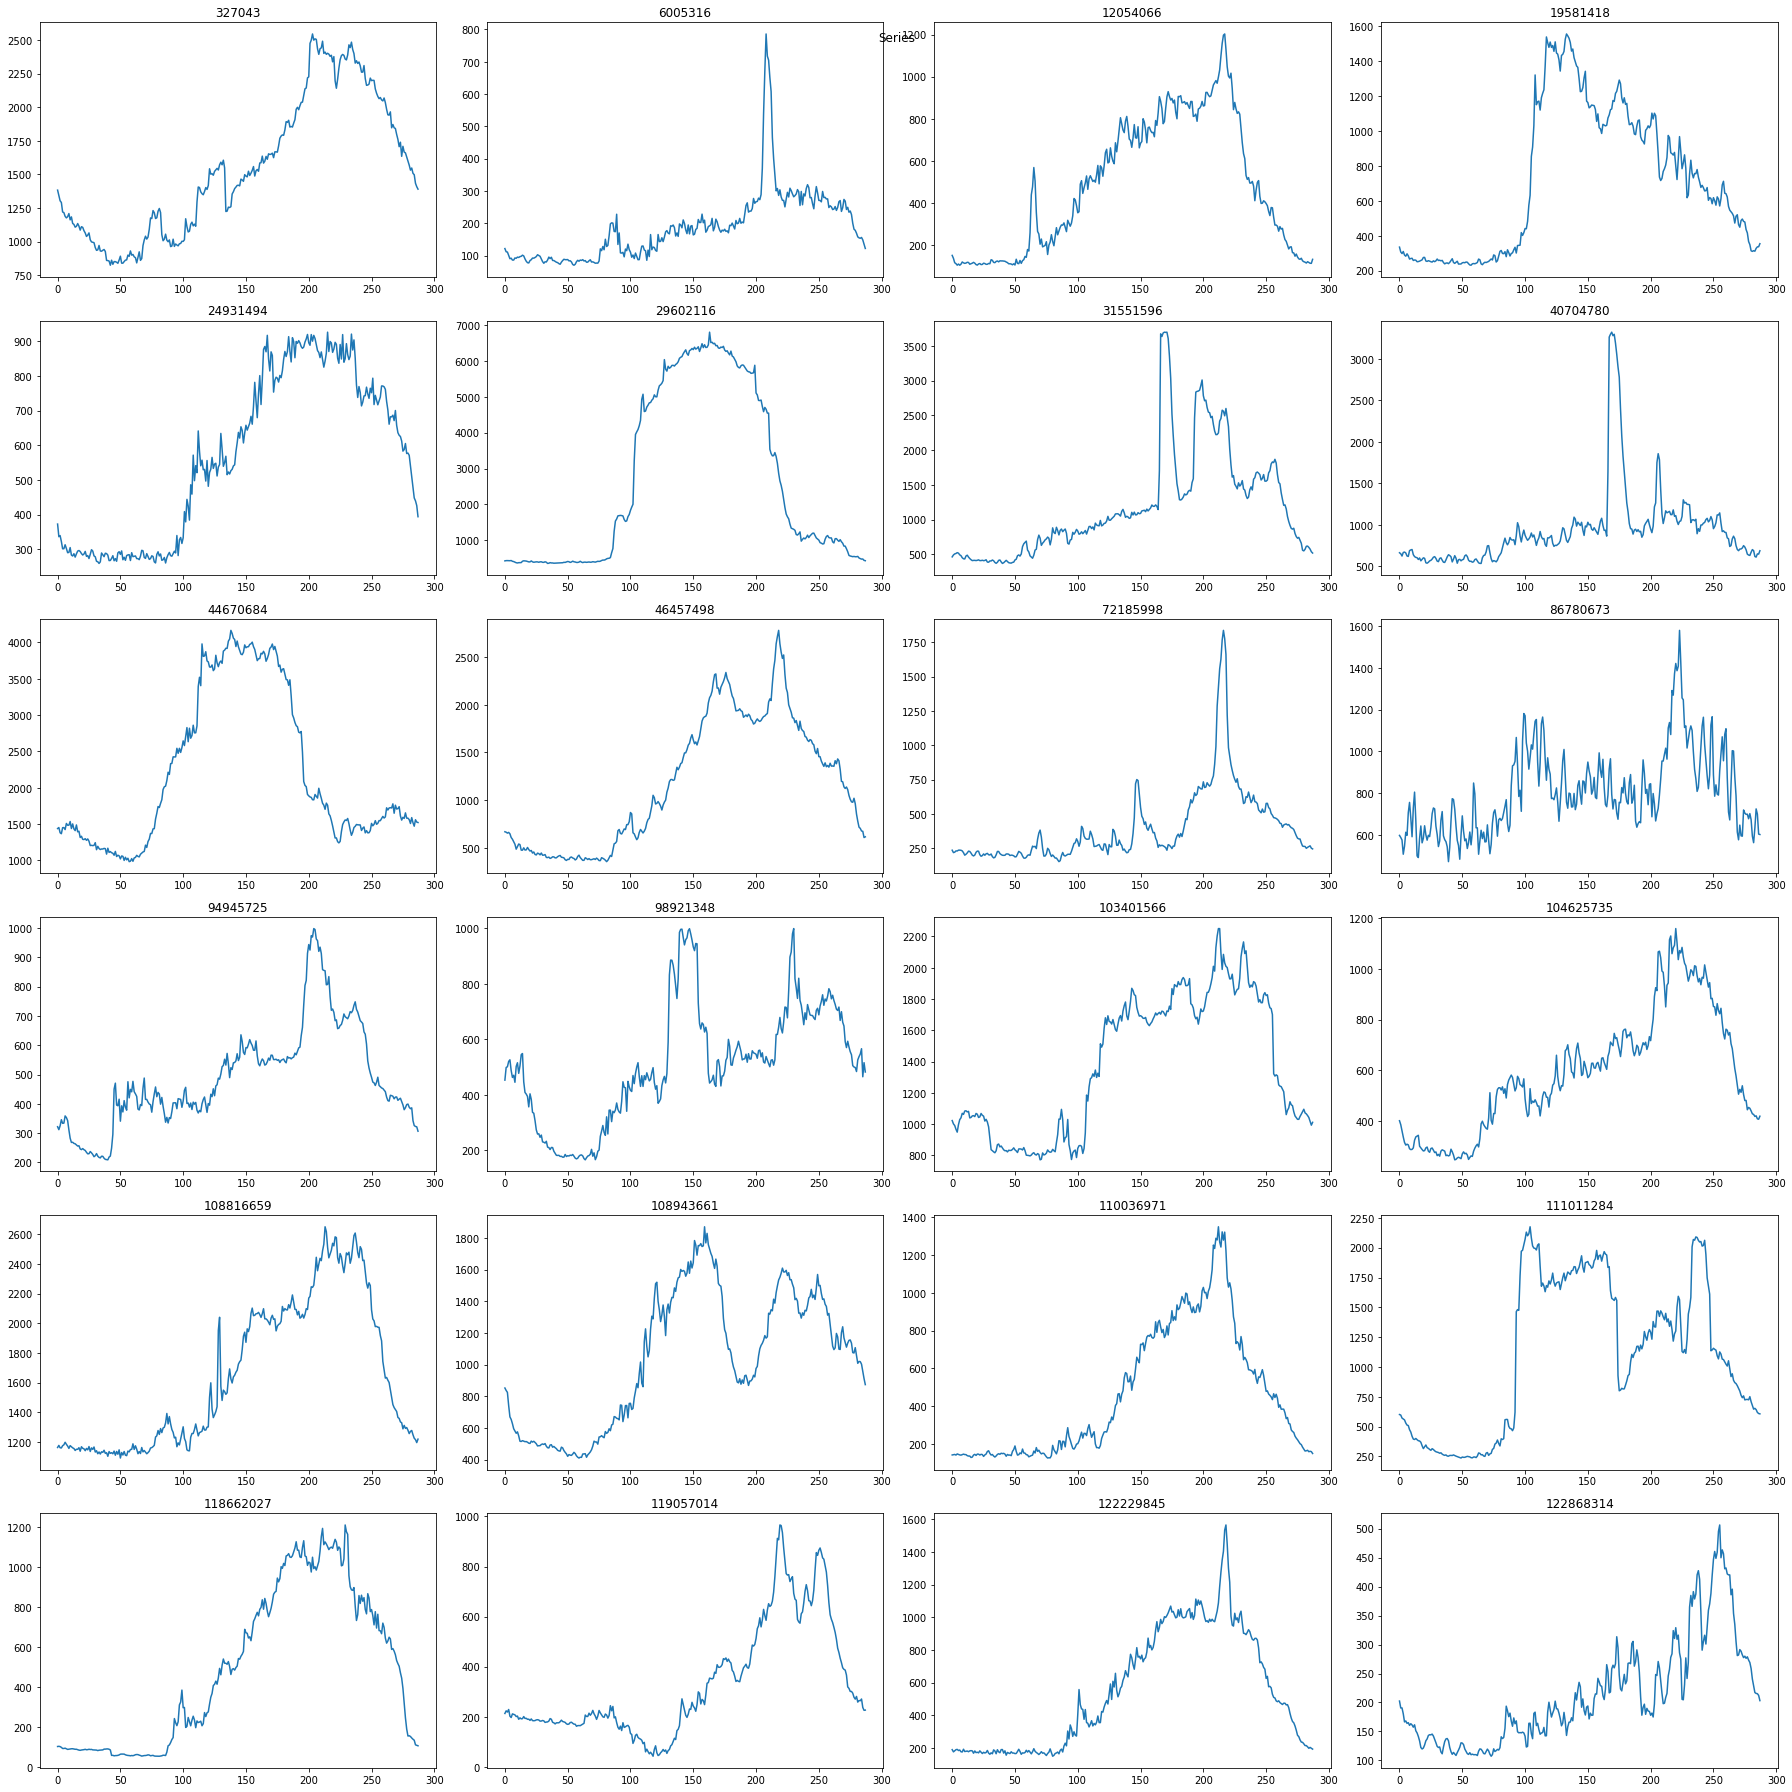

In [ ]:
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(mySeries): 
            continue
        axs[i, j].plot(mySeries[i*4+j].values)
        axs[i, j].set_title(mySeries[i*4+j].name)
img_count+=1
plt.savefig(f"summer{img_count}.png")
plt.show()

In [ ]:
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i].to_numpy().reshape(-1,1))
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [ ]:
som_x = 1
som_y = 5

random_state=42

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

In [ ]:
# to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,10))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[y].plot(series,c="gray",alpha=0.5) 
                axs[y].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[y].set_title(f"Cluster {cluster_number}")
    plt.savefig(f"summer6.png")
    plt.show()

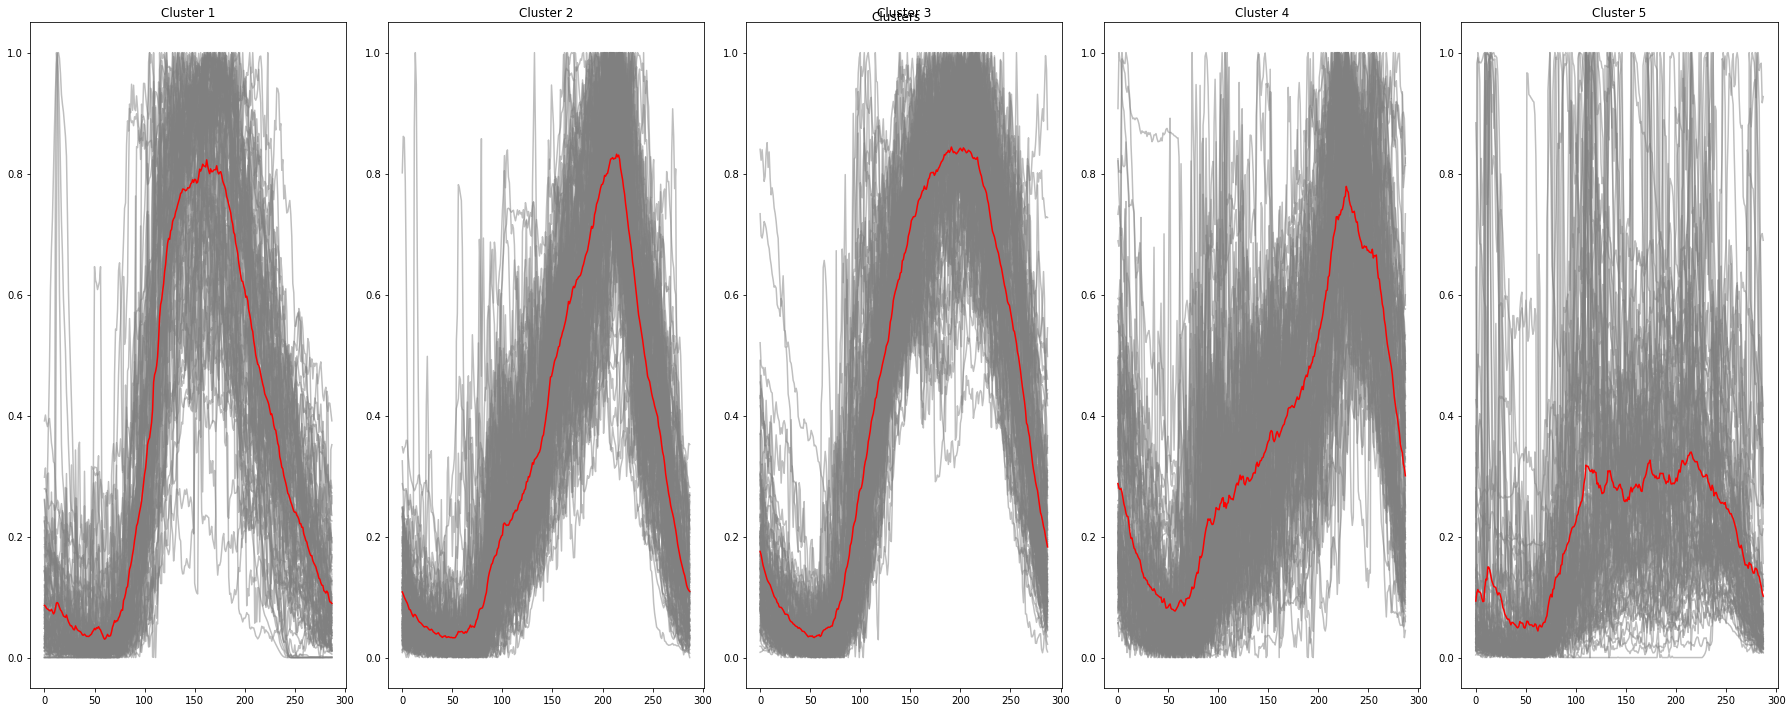

In [ ]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

In [ ]:
def plot_centroids(som_x, som_y, win_map):
    i = 1
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                ax = plt.plot(np.average(np.vstack(win_map[cluster]),axis=0),label=f'cluster_{i}')
            i=i+1
            cluster_number = x*som_y+y+1
            
    plt.xlabel('Time of the day')
    plt.ylabel('Power consumption (W) ')
    plt.legend()
    plt.savefig(f"summer7.png")
    plt.show()

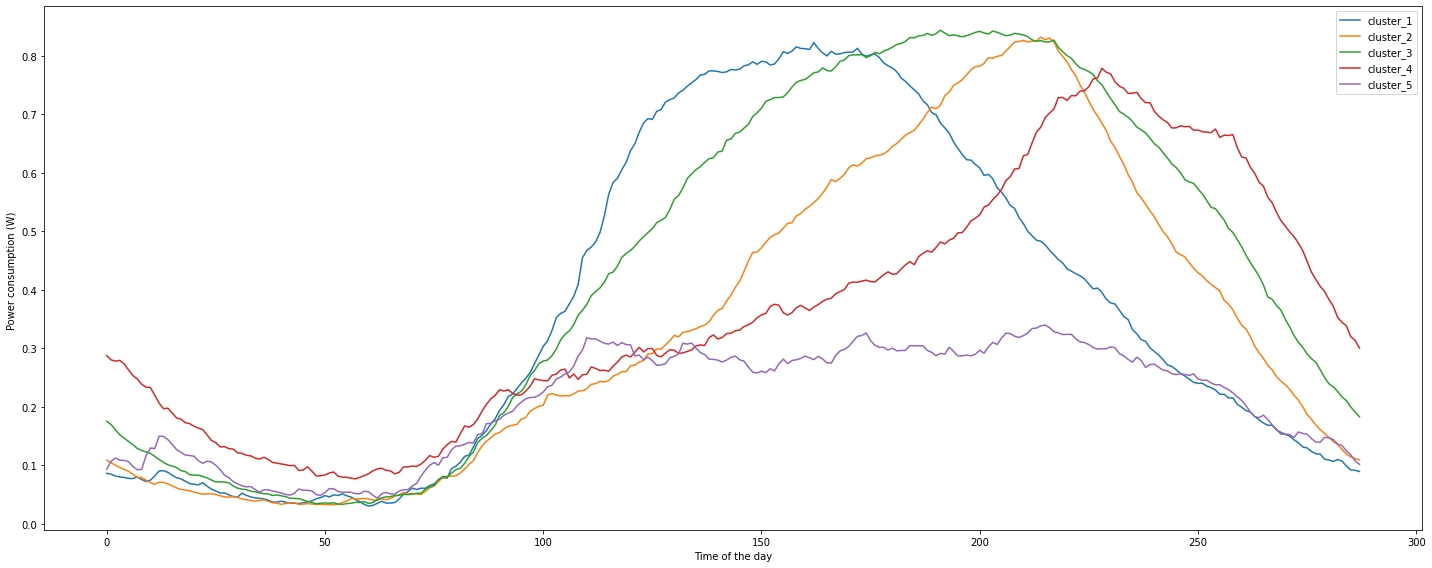

In [ ]:
plot_centroids(som_x, som_y, win_map)

In [ ]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,10))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[y].plot(series,c="gray",alpha=0.5) 
                axs[y].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[y].set_title(f"Cluster {cluster_number}")
    
    plt.savefig("summer8.png")
    plt.show()

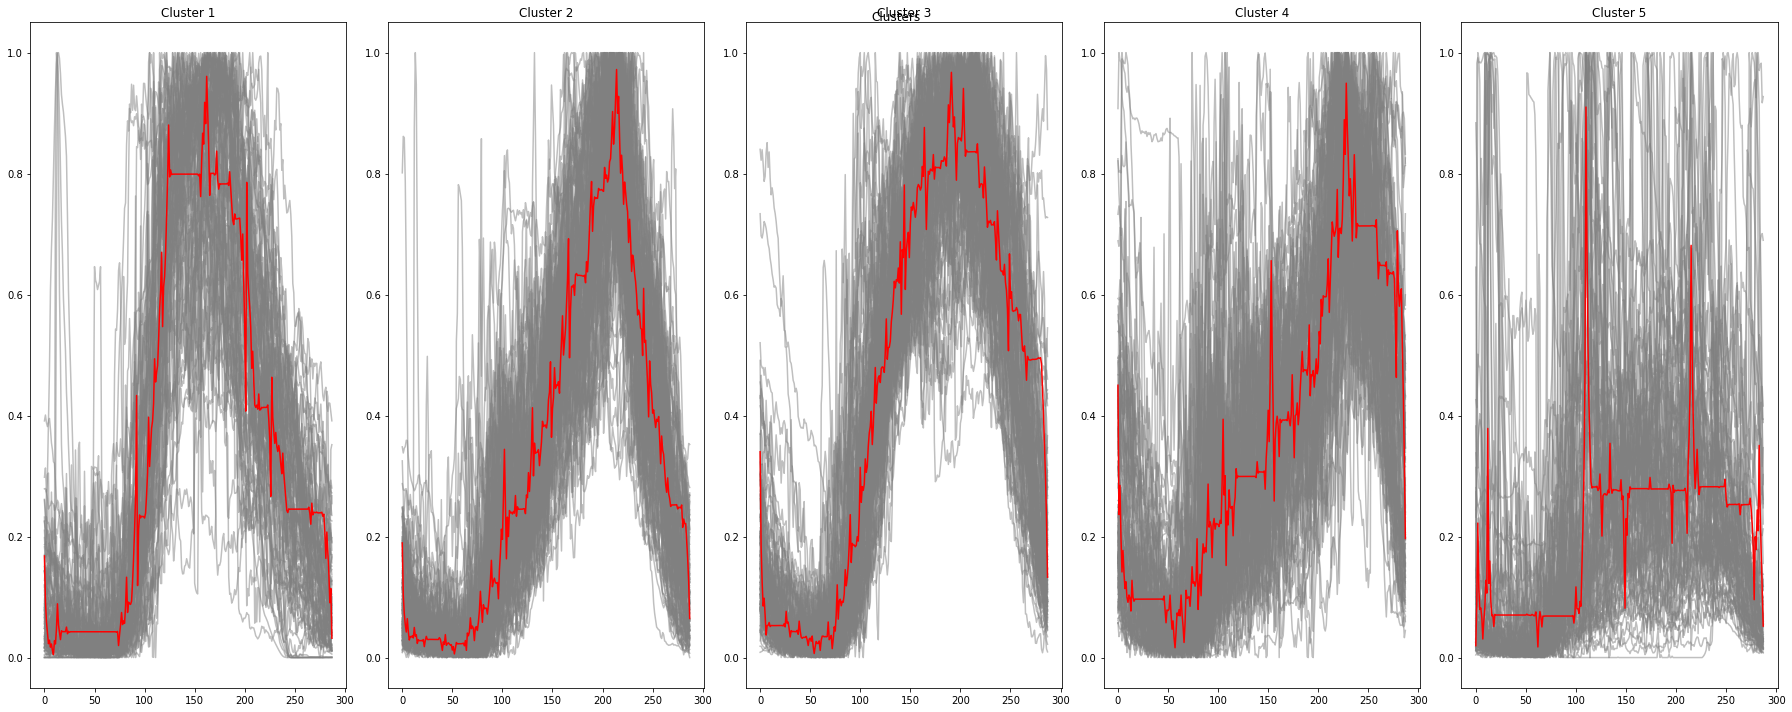

In [ ]:
win_map = som.win_map(mySeries)

plot_som_series_dba_center(som_x, som_y, win_map)

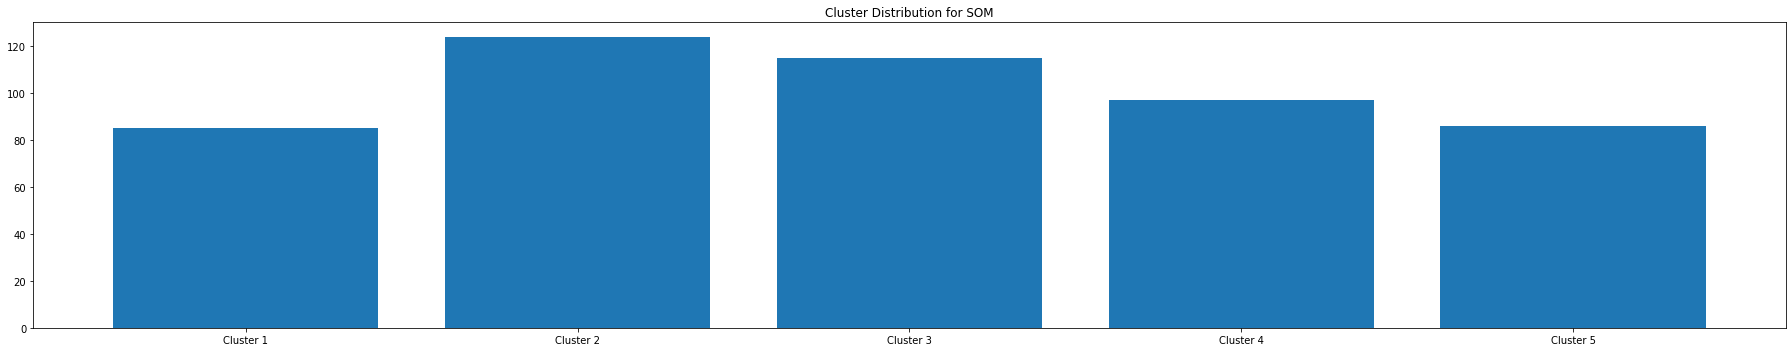

In [ ]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.savefig("summer9.png")
plt.show()

In [ ]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((mySeries_id[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

clustered = pd.DataFrame(cluster_map,columns=["site_id","cluster_type"]).sort_values(by="cluster_type")

In [ ]:
clustered.head()

site_id cluster_type
253  1093415017    Cluster 1
205   901780483    Cluster 1
206   904473388    Cluster 1
211   915882126    Cluster 1
212   916614035    Cluster 1

In [ ]:
f"Cluster {som.winner(mySeries[111])[0]*som_y+winner_node[1]+1}"

'Cluster 1'

# Clustering for Battery Size

In [ ]:
def generate_data_for_clustering_gap(data_load, data_gen):
  df_load_for_clustering = data_load.transpose()
  df_load_for_clustering.columns = unique_ids
  df_load_for_clustering.drop('site_id', inplace =True)
  df_load_for_clustering.index.name = 'date'

  df_gen_for_clustering = data_gen.transpose()
  df_gen_for_clustering.columns = unique_ids
  df_gen_for_clustering.drop('site_id', inplace =True)
  df_gen_for_clustering.index.name = 'date'

  

  mySeries1 = []
  for id in df_load_for_clustering.columns:
    mySeries1.append(df_load_for_clustering[id])

  mySeries2 = []
  for id in df_gen_for_clustering.columns:
    mySeries2.append(df_gen_for_clustering[id])

  my_gap_series = []
  for i in range(len(mySeries)):
    my_gap_series.append(mySeries1[i] - mySeries2[i])

  return df_load_for_clustering, df_gen_for_clustering, my_gap_series

In [ ]:
df_load_for_clustering, df_gen_for_clustering, my_gap_series =  generate_data_for_clustering_gap(df_load, df_gen)

In [ ]:
my_gap_series[7]

date
00:05:00    662.2577
00:10:00    650.2330
00:15:00    622.6331
00:20:00    665.6656
00:25:00    670.6957
              ...   
23:40:00    617.0336
23:45:00    609.9355
23:50:00    648.4225
23:55:00    645.9316
00:00:00    686.5201
Name: 40704780, Length: 288, dtype: float64

In [ ]:
for i in range(len(my_gap_series)):
    scaler = MinMaxScaler()
    my_gap_series[i] = MinMaxScaler().fit_transform(my_gap_series[i].to_numpy().reshape(-1,1))
    my_gap_series[i]= my_gap_series[i].reshape(len(my_gap_series[i]))

In [ ]:
som_x = 1
som_y = 5

random_state= 42

som_for_battery = MiniSom(som_x, som_y,len(my_gap_series[0]), sigma=0.3, learning_rate = 0.1)

som_for_battery.random_weights_init(my_gap_series)
som_for_battery.train(my_gap_series, 50000)

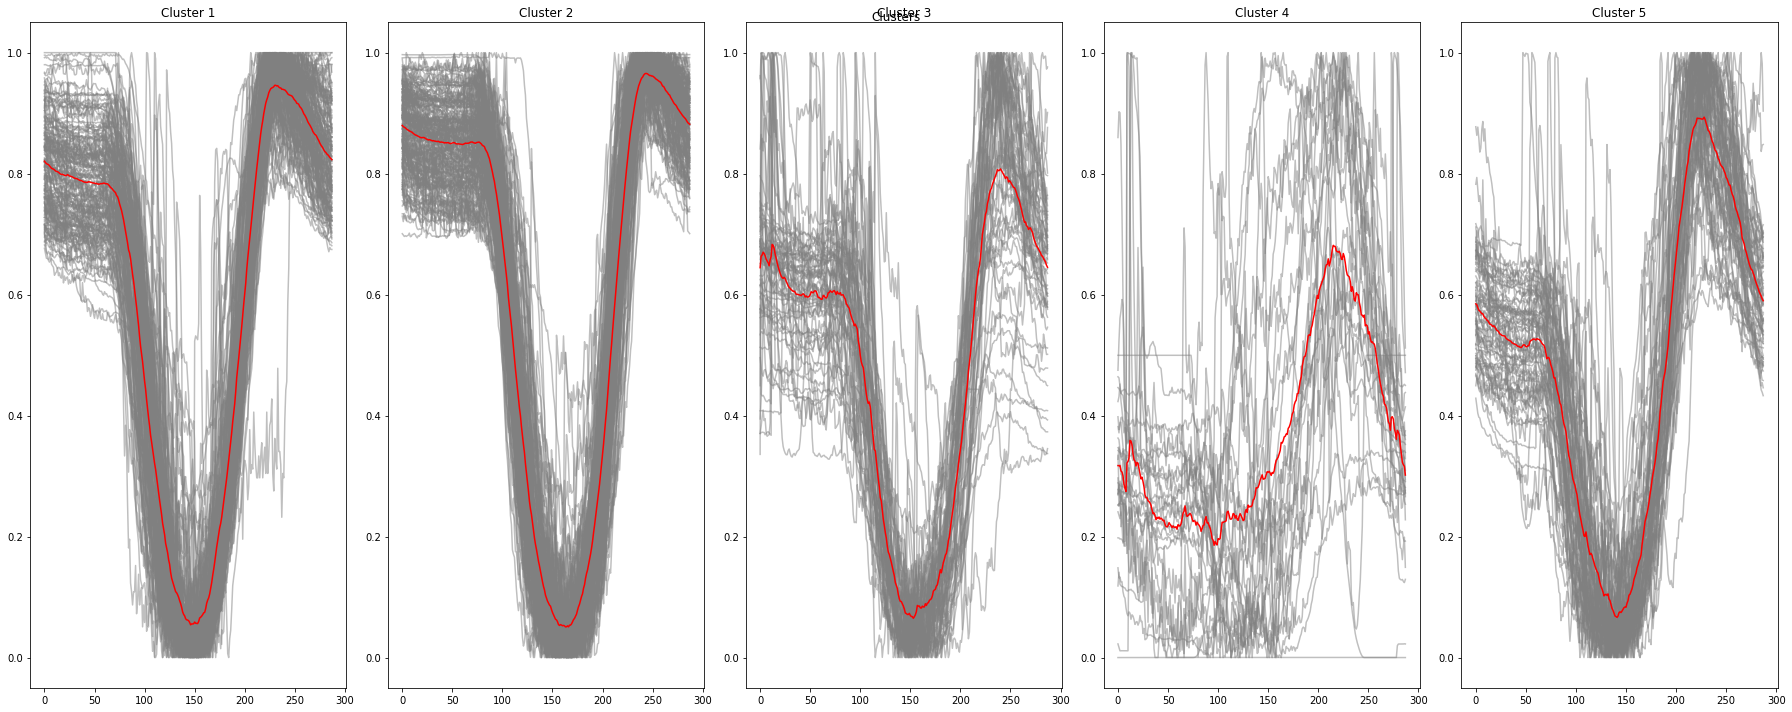

In [ ]:
win_map_for_battery = som_for_battery.win_map(my_gap_series)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map_for_battery)

In [ ]:
cluster_map_2 = []
for idx in range(len(my_gap_series)):
    winner_node = som_for_battery.winner(my_gap_series[idx])
    cluster_map_2.append((mySeries_id[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

clustered_2 = pd.DataFrame(cluster_map_2,columns=["site_id","cluster_type"]).sort_values(by="cluster_type")

In [ ]:
clustered_2

site_id cluster_type
126   571926361    Cluster 1
363  1568726976    Cluster 1
362  1567743499    Cluster 1
146   643496521    Cluster 1
150   662300586    Cluster 1
..          ...          ...
356  1542990109    Cluster 5
155   683590089    Cluster 5
157   691371646    Cluster 5
49    257847471    Cluster 5
506  2138660056    Cluster 5

[507 rows x 2 columns]

In [ ]:
def ToU(data):
    data['ToU(cent/kWh)'] = 0
    data.loc[(data['time'].dt.hour < 7) | (data['time'].dt.hour >=20), 'ToU(cent/kWh)'] = 11
    data.loc[(data['time'].dt.hour >= 7) & (data['time'].dt.hour < 14) , 'ToU(cent/kWh)'] = 20
    data.loc[(data['time'].dt.hour >= 14) & (data['time'].dt.hour < 20) , 'ToU(cent/kWh)'] = 50
    return data

def get_bill_no_battery(data):
    data = data.copy()
    data['time'] = pd.to_datetime(data['time'], format = '%H:%M:%S')
    data = ToU(data)
    data['price($)'] = 0
    i = 0
    while i < len(data):
        if data.loc[i,'net_energy(Wh)']<0:
            data.loc[i,'price($)'] =  data.loc[i,'net_energy(Wh)'] * data.loc[i,'ToU(cent/kWh)'] /100000
        else:
            data.loc[i,'price($)'] =  data.loc[i,'net_energy(Wh)'] * 6 /100000
        i += 1
    bill = data['price($)'].sum()
    return -bill*90

def get_bill_with_battery(data, E_opt):
    data = data.copy()
    if E_opt == 0:
        return get_bill_no_battery(data)
    E_max = data['E_t'].max()
    data['time'] = pd.to_datetime(data['time'], format = '%H:%M:%S')
    data = ToU(data)
    data['price($)'] = 0
    i = 1
    while i < len(data):
        new_cap = data.loc[i,'net_energy(Wh)']+data.loc[i-1,'E_t']
        if data.loc[i,'E_t'] == 0:
            data.loc[i,'price($)'] =  new_cap * data.loc[i,'ToU(cent/kWh)'] /100000
        elif data.loc[i,'E_t'] == E_max:
            data.loc[i,'price($)'] =  (new_cap-E_max) * 6 /100000
        i += 1
    bill = data['price($)'].sum()
    if len(data[data['E_t']>0].index)> 0:
        index = data[data['E_t']>0].index[0]
        energy_used_before_gain = data['net_energy(Wh)'].loc[:index-1].sum()
        energy_left = data.loc[data.index[-1],'E_t']
        if energy_left + energy_used_before_gain > 0:#check if the energy left is sufficient to use at the following day before the battery is charged
            earn = data['price($)'].loc[data['price($)']>0].sum()
            return -(bill+89*earn) #about 90 days for three month
        elif energy_left != 0:
            i = 0 #estimate the situation at the following day
            while True:
                if energy_left + data['net_energy(Wh)'].loc[:i+1].sum() <0:
                    break
                i+= 1
            bill_2 = data.loc[i+1:,'price($)'].sum() #calculate bill for the following day
            return -(bill+89*bill_2)
        else:
            return -bill*90
    else:
        return -bill*90 

def net_energy(gen, load): #input: the gen and load data
  dataset = []
  i = 0
  while i <len(gen):
      gen_new = gen.iloc[i,1:]
      load_new = load.iloc[i,1:]
      net = (gen_new - load_new)/12
      data = pd.DataFrame({'time':gen.columns[1:], 'net_energy(Wh)':net}).reset_index(drop=True)
      #data = pd.concat([data,data.copy()],axis = 0).reset_index(drop=True)
      dataset.append(data)
      i += 1
  return dataset # a list of dataframe, each dataframe stored each household with only two columns: time and net_energy(Wh)

def E_t_inf_cap(data):
  data['E_t'] = 0
  for i in range(1,len(data)):
    new_cap = data.loc[i,'net_energy(Wh)']+data.loc[i-1,'E_t']
    if new_cap < 0:
      new_cap = 0
    data.loc[i,'E_t'] = new_cap
  return data

def E_t_fixed_cap(data, E_max):
  data['E_t'] = 0
  for i in range(1,len(data)):
    new_cap = data.loc[i,'net_energy(Wh)']+data.loc[i-1,'E_t']
    if new_cap < 0:
      new_cap = 0
    elif new_cap > E_max:
      new_cap = E_max
    data.loc[i,'E_t'] = new_cap
  return data

def get_E_max_pr(data):
  E_max = data['E_t'].max()
  if len(data[data['E_t']>0].index)> 0:
    index = data[data['E_t']>0].index[0]
    energy_used_before_gain = data['net_energy(Wh)'].loc[:index-1].sum()
    energy_left = data.loc[data.index[-1],'E_t']
    if energy_left + energy_used_before_gain > 0:#check if the energy left is sufficient to use at the followa day before the battery is charged
      pr = 1- data['E_t'].value_counts()[0]/(len(data)*90) #about 90 days for three month
    elif energy_left != 0:
      i = 0 #estimate the situation at the following day
      while True:
        if energy_left + data['net_energy(Wh)'].loc[:i+1].sum() <0:
          break
        i+= 1 #count the number of zero decreased at the following day
      zero_1 = data['E_t'].value_counts()[0] #count the zero at the first day
      zero_2 = zero_1 - i #count the number of zero at the second day
      pr = 1 - (zero_1+zero_2*89)/(len(data)*90) #about 90 days for three month
    else:
      pr = 1- data['E_t'].value_counts()[0]/len(data) 
  else:
    pr = 1- data['E_t'].value_counts()[0]/len(data) 
  return E_max,pr

def E_opt(data, constraint): #input only one dataframe from the dataset above
  E_h, pr = get_E_max_pr(E_t_inf_cap(data))
  E_l = 0
  if pr < constraint:
    return E_h
  E_c = (E_h +E_l)/2
  tolerance = 10
  while True:
    f_E_c = E_t_fixed_cap(data, E_c)
    E_c_max, pr = get_E_max_pr(f_E_c)
    diff = pr - constraint
    if diff < 0:
      E_l = E_c
    else:
      E_h = E_c
    E_c_new = (E_h +E_l)/2
    if abs(E_c_new - E_c) < tolerance:
      return E_c
    else:
      E_c = E_c_new

In [ ]:
dataset = net_energy(df_gen,df_load)

In [ ]:
E_optimal = []
bill_no_battery = []
bill_with_battery = []
for household in dataset:
    E_op = E_opt(household,0.8)
    E_optimal.append(E_op)
    bill_no_battery.append(get_bill_no_battery(household))
    bill_with_battery.append(get_bill_with_battery(household, E_op))

In [ ]:
E_opt_result = pd.DataFrame({'site_id':df_gen['site_id'], 'E_opt(Wh)':E_optimal})
E_opt_result

site_id     E_opt(Wh)
0        327043  14146.495920
1       6005316   1448.126296
2      12054066   2125.872272
3      19581418   3388.989259
4      24931494   3691.036917
..          ...           ...
502  2121566623   2815.214873
503  2123601246   2852.790465
504  2126348649   3075.816514
505  2132171512   4513.516008
506  2138660056   9325.859791

[507 rows x 2 columns]

In [ ]:
result1 = pd.merge(E_opt_result, clustered_2, on="site_id")
result1

site_id     E_opt(Wh) cluster_type
0        327043  14146.495920    Cluster 2
1       6005316   1448.126296    Cluster 2
2      12054066   2125.872272    Cluster 2
3      19581418   3388.989259    Cluster 2
4      24931494   3691.036917    Cluster 3
..          ...           ...          ...
502  2121566623   2815.214873    Cluster 1
503  2123601246   2852.790465    Cluster 2
504  2126348649   3075.816514    Cluster 1
505  2132171512   4513.516008    Cluster 3
506  2138660056   9325.859791    Cluster 5

[507 rows x 3 columns]

# Training regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

result1['cluster_type'] = result1['cluster_type'].apply({'Cluster 1':1, 'Cluster 2':2, 'Cluster 3':3, 'Cluster 4':4, 'Cluster 5':5}.get)

In [ ]:
# prediciton plot 

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.savefig("summer.png")
  plt.show()

7867633.434949177


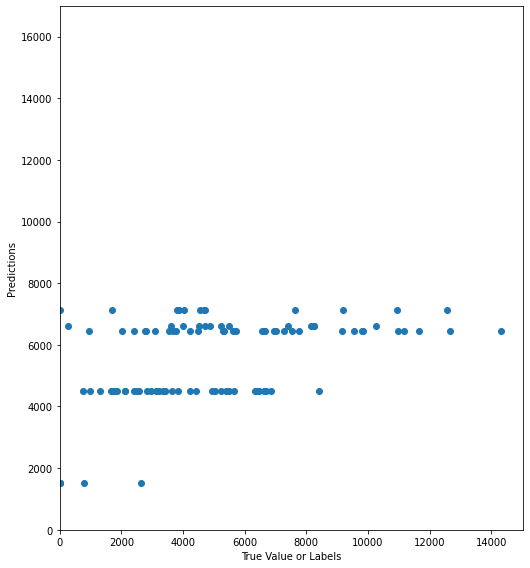

In [ ]:
trainDataset1 = result1.sample(frac=0.8, random_state=0) 
testDataset1 = result1.drop(trainDataset1.index)

rfr1 = RandomForestRegressor(n_estimators=50, criterion='squared_error', bootstrap=True)
rfr1.fit(trainDataset1['cluster_type'].to_numpy().reshape(-1, 1), trainDataset1['E_opt(Wh)'])

pred1 = rfr1.predict(testDataset1['cluster_type'].to_numpy().reshape(-1, 1))

error1 = mean_squared_error(testDataset1['E_opt(Wh)'], pred1)
print(error1)

predPlot(testDataset1['E_opt(Wh)'], pred1)

In [ ]:
def hourly_avg(data):
    data_new = data.iloc[:,1:].groupby(np.arange(len(data.columns)-1)//12, axis=1).mean()
    data_new = pd.concat([data.iloc[:,0],data_new],axis = 1)
    return data_new

def gap_hourly(gen, load):
    gap = load -gen
    gap['site_id'] = gen['site_id']
    return hourly_avg(gap)

avg = gap_hourly(df_gen, df_load)

result2 = pd.merge(result1, avg, on="site_id")

result2.head()

site_id     E_opt(Wh)  cluster_type            0            1           2  \
0    327043  14146.495920             2  1238.462467  1101.663300  980.889075   
1   6005316   1448.126296             2    95.313042    89.639308   90.049042   
2  12054066   2125.872272             2   117.005367   111.794025  115.655683   
3  19581418   3388.989259             2   289.038917   259.656100  255.405167   
4  24931494   3691.036917             3   312.669358   286.713250  277.327117   

            3           4           5            6  ...           14  \
0  870.342117  872.521308  924.501558  1144.119483  ... -3184.068408   
1   82.910033   81.168442   82.911958   107.912267  ...  -946.759675   
2  119.381100  121.835042  324.965358   162.006017  ... -2513.927008   
3  247.301333  241.150158  247.398100   196.682208  ... -2653.568817   
4  275.879750  281.556325  279.891258   267.730433  ...  -560.362625   

            15           16           17          18           19  \
0 -2692.046392 -1712.347392  -573.000308  420.177625  1951.945925   
1  -899.047833  -754.480633  -278.973892 -135.507567   151.228025   
2 -2172.606108 -1455.602325  -340.922517  309.487475   443.177100   
3 -2395.707492 -1841.912542 -1063.410233  -56.252667   520.211817   
4  -380.487658  -156.210550   139.462158  514.506133   789.359533   

            20           21           22           23  
0  2223.535783  2065.337875  1804.802550  1536.521808  
1   280.421667   263.911700   251.419108   164.708900  
2   422.268600   314.450808   185.708133   123.255458  
3   636.831533   618.259058   495.261925   347.868717  
4   746.549708   739.834367   652.089675   512.026300  

[5 rows x 27 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


761848.1693307427


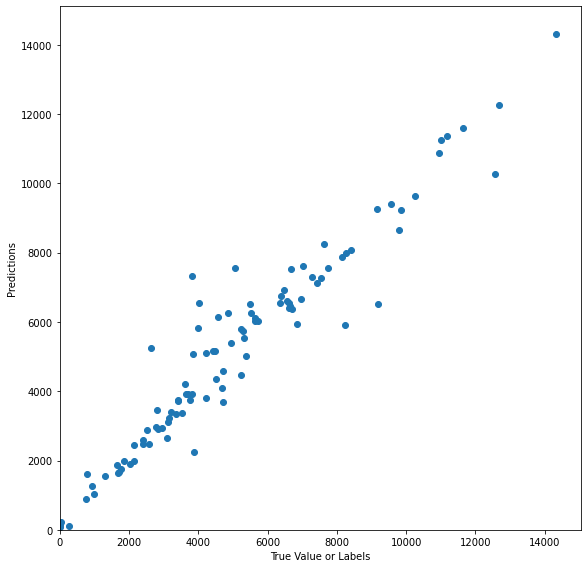

In [ ]:
trainDataset2 = result2.sample(frac=0.8, random_state=0) 
testDataset2 = result2.drop(trainDataset2.index)

rfr2 = RandomForestRegressor(n_estimators=50, criterion='squared_error', bootstrap=True)
rfr2.fit(trainDataset2.iloc[: , 2:], trainDataset2['E_opt(Wh)'])

pred2 = rfr2.predict(testDataset2.iloc[: , 2:])

error2 = mean_squared_error(testDataset2['E_opt(Wh)'], pred2)
print(error2)

predPlot(testDataset2['E_opt(Wh)'], pred2)

In [ ]:
costs_result = pd.DataFrame({'site_id':df_gen['site_id'], 
                       'E_opt(Wh)':E_optimal,
                       'cost_1': bill_no_battery,
                       'cost_2': bill_with_battery})
costs_result.to_csv("summer_costs_result.csv",index=False)

result3 = pd.merge(result1, costs_result[['site_id', 'cost_1', 'cost_2']], on="site_id")
result3.head()

site_id     E_opt(Wh)  cluster_type      cost_1     cost_2
0    327043  14146.495920             2  153.062034  13.155048
1   6005316   1448.126296             2   -7.859114 -19.041952
2  12054066   2125.872272             2  -43.832525 -79.024441
3  19581418   3388.989259             2  -34.991104 -68.885198
4  24931494   3691.036917             3   93.896885  28.371382

2466111.948452048


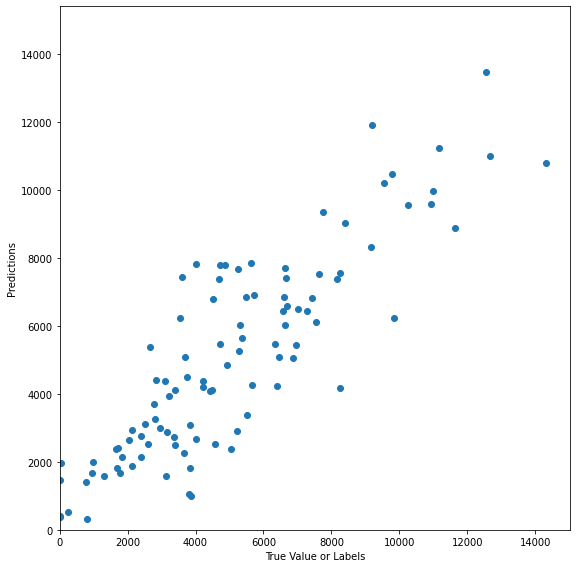

In [ ]:
trainDataset3 = result3.sample(frac=0.8, random_state=0) 
testDataset3 = result3.drop(trainDataset3.index)

rfr3 = RandomForestRegressor(n_estimators=50, criterion='squared_error', bootstrap=True)
rfr3.fit(trainDataset3.iloc[: , 2:], trainDataset3['E_opt(Wh)'])

pred3 = rfr3.predict(testDataset3.iloc[: , 2:])

error3 = mean_squared_error(testDataset3['E_opt(Wh)'], pred3)
print(error3)

predPlot(testDataset3['E_opt(Wh)'], pred3)

In [ ]:
predAll = rfr2.predict(result2.iloc[: , 2:])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
random_state = 42
summerPreds = result3.copy()
summerPreds['E_opt(Wh)'] = (summerPreds['E_opt(Wh)']/1000).round(decimals=4)
summerPreds.rename(columns={'E_opt(Wh)' : 'computed_summer_E_opt(KWh)'}, inplace=True)
summerPreds['pred_summer_E_opt(KWh)'] = (predAll/1000).round(decimals=4)

In [ ]:
summerPreds

site_id  computed_summer_E_opt(KWh)  cluster_type      cost_1  \
0        327043                     14.1465             2  153.062034   
1       6005316                      1.4481             2   -7.859114   
2      12054066                      2.1259             2  -43.832525   
3      19581418                      3.3890             2  -34.991104   
4      24931494                      3.6910             3   93.896885   
..          ...                         ...           ...         ...   
502  2121566623                      2.8152             1  -55.045479   
503  2123601246                      2.8528             2  -12.342001   
504  2126348649                      3.0758             1  -79.739635   
505  2132171512                      4.5135             3   61.371914   
506  2138660056                      9.3259             5  211.093964   

         cost_2  pred_summer_E_opt(KWh)  
0     13.155048                 14.1780  
1    -19.041952                  1.5840  
2    -79.024441                  2.0154  
3    -68.885198                  3.4615  
4     28.371382                  4.1342  
..          ...                     ...  
502 -102.196002                  2.9875  
503  -44.242223                  3.0683  
504 -126.287504                  2.9937  
505   13.987273                  4.5066  
506   17.293860                  8.8935  

[507 rows x 6 columns]

In [ ]:
summerPreds.to_csv("summerPreds.csv", index=False)

4804452.046805901


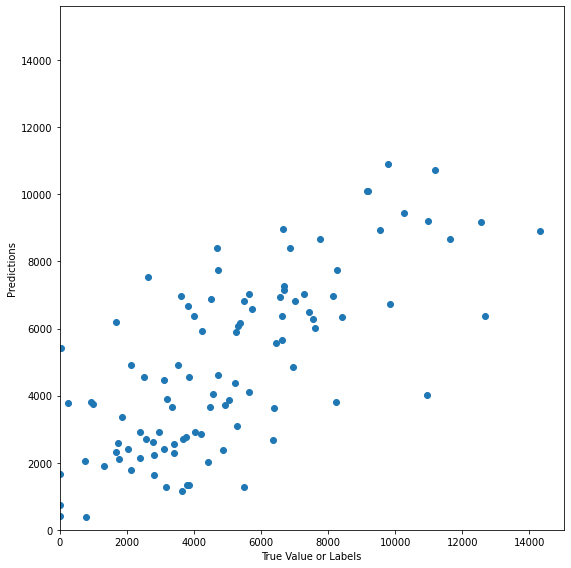

In [ ]:
# trainDataset4 = result3.sample(frac=0.8, random_state=0) 
# testDataset4 = result3.drop(trainDataset3.index)

rfr4 = RandomForestRegressor(n_estimators=50, criterion='squared_error', bootstrap=True)
rfr4.fit(trainDataset3.iloc[: , 2: -1], trainDataset3['E_opt(Wh)'])

pred4 = rfr4.predict(testDataset3.iloc[: , 2: -1])

error4 = mean_squared_error(testDataset3['E_opt(Wh)'], pred4)
print(error4)

predPlot(testDataset3['E_opt(Wh)'], pred4)

`KMEANS`

In [ ]:
cluster_count = 5
random_state = 42
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

In [ ]:
def plot_centroids_for_kmeans(x, plot_count, labels):
    i = 1
    row_i=0
    column_j=0
    fig.suptitle('Clusters')

    for label in set(labels):

        cluster = []
        for i in range(len(labels)):
                if(labels[i]==label):
                    cluster.append(mySeries[i])
        if len(cluster) > 0:
            axs = plt.plot(np.average(np.vstack(cluster),axis=0),label=f'cluster_{column_j}')
        column_j+=1
        if column_j%plot_count == 0:
            row_i+=1
            column_j=0
            
            
    plt.xlabel('Time of the day')
    plt.ylabel('Power consumption (W) ')
    plt.legend()
    plt.savefig(f"summer_clusters.png")
    plt.show()

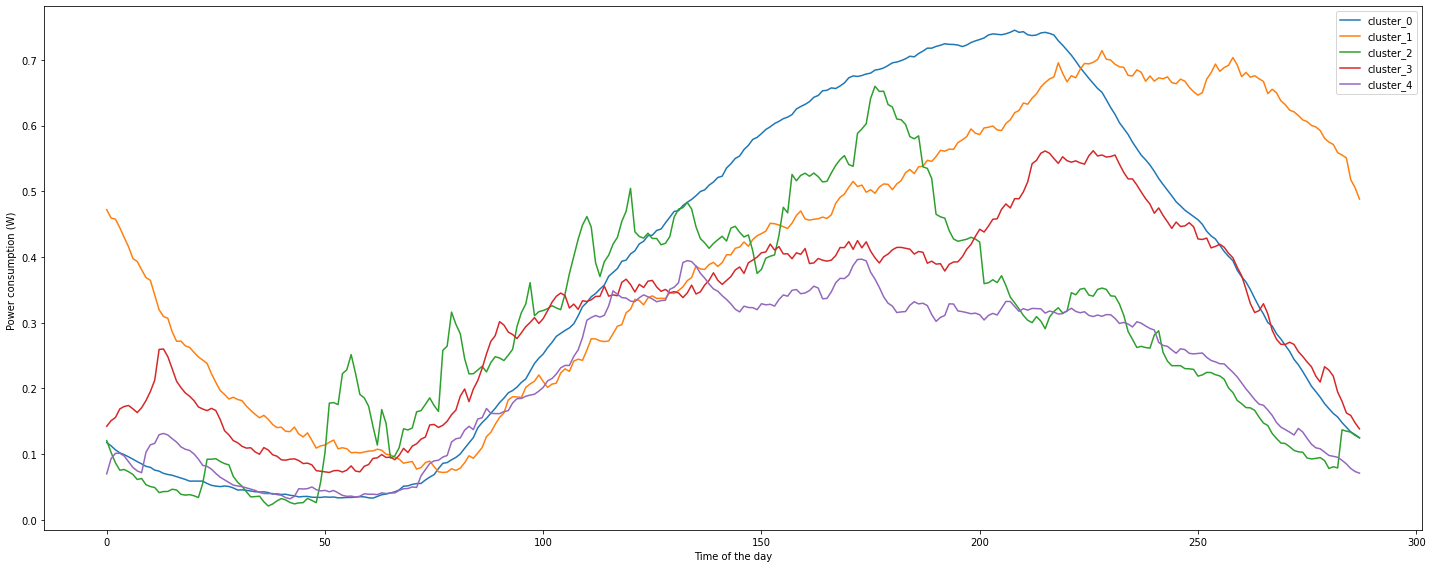

In [ ]:
plot_centroids_for_kmeans(1, 5, labels)

In [ ]:
# plot_count = 5

# fig, axs = plt.subplots(1,plot_count,figsize=(25,10))
# fig.suptitle('Clusters')
# row_i=0
# column_j=0
# # For each label there is,
# # plots every series with that label
# for label in set(labels):
#     cluster = []
#     for i in range(len(labels)):
#             if(labels[i]==label):
#                 axs[column_j].plot(mySeries[i],c="gray",alpha=0.4)
#                 cluster.append(mySeries[i])
#     if len(cluster) > 0:
#         axs[ column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
#     axs[column_j].set_title("Cluster "+str(row_i*som_y+column_j))
#     column_j+=1
#     if column_j%plot_count == 0:
#         row_i+=1
#         column_j=0
        
# plt.show()

In [ ]:
# cluster_c = [len(labels[labels==i]) for i in range( cluster_count)]
# cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
# plt.figure(figsize=(15,5))
# plt.title("Cluster Distribution for KMeans")
# plt.bar(cluster_n,cluster_c)
# plt.show()

In [ ]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
clustered_x = pd.DataFrame(zip(list(df_gen.site_id),fancy_names_for_labels),columns=["site_id","cluster_type"])

In [ ]:
clustered_x

site_id cluster_type
0        327043    Cluster 0
1       6005316    Cluster 0
2      12054066    Cluster 0
3      19581418    Cluster 0
4      24931494    Cluster 0
..          ...          ...
502  2121566623    Cluster 0
503  2123601246    Cluster 3
504  2126348649    Cluster 0
505  2132171512    Cluster 0
506  2138660056    Cluster 0

[507 rows x 2 columns]

In [ ]:
avg.head()

# result2 = pd.merge(result1, avg, on="site_id")

# result2.head()

site_id            0            1           2           3           4  \
0    327043  1238.462467  1101.663300  980.889075  870.342117  872.521308   
1   6005316    95.313042    89.639308   90.049042   82.910033   81.168442   
2  12054066   117.005367   111.794025  115.655683  119.381100  121.835042   
3  19581418   289.038917   259.656100  255.405167  247.301333  241.150158   
4  24931494   312.669358   286.713250  277.327117  275.879750  281.556325   

            5            6           7           8  ...           14  \
0  924.501558  1144.119483  702.599642   17.868458  ... -3184.068408   
1   82.911958   107.912267  105.820058  -24.475383  ...  -946.759675   
2  324.965358   162.006017  -37.752300 -585.728000  ... -2513.927008   
3  247.398100   196.682208  -71.758442 -403.826658  ... -2653.568817   
4  279.891258   267.730433  211.196317   54.193392  ...  -560.362625   

            15           16           17          18           19  \
0 -2692.046392 -1712.347392  -573.000308  420.177625  1951.945925   
1  -899.047833  -754.480633  -278.973892 -135.507567   151.228025   
2 -2172.606108 -1455.602325  -340.922517  309.487475   443.177100   
3 -2395.707492 -1841.912542 -1063.410233  -56.252667   520.211817   
4  -380.487658  -156.210550   139.462158  514.506133   789.359533   

            20           21           22           23  
0  2223.535783  2065.337875  1804.802550  1536.521808  
1   280.421667   263.911700   251.419108   164.708900  
2   422.268600   314.450808   185.708133   123.255458  
3   636.831533   618.259058   495.261925   347.868717  
4   746.549708   739.834367   652.089675   512.026300  

[5 rows x 25 columns]

In [ ]:
result4 = pd.merge(clustered_x, avg, on="site_id")
result4= pd.merge(E_opt_result, result4, on="site_id") 
result4.head()

site_id     E_opt(Wh) cluster_type            0            1           2  \
0    327043  14146.495920    Cluster 0  1238.462467  1101.663300  980.889075   
1   6005316   1448.126296    Cluster 0    95.313042    89.639308   90.049042   
2  12054066   2125.872272    Cluster 0   117.005367   111.794025  115.655683   
3  19581418   3388.989259    Cluster 0   289.038917   259.656100  255.405167   
4  24931494   3691.036917    Cluster 0   312.669358   286.713250  277.327117   

            3           4           5            6  ...           14  \
0  870.342117  872.521308  924.501558  1144.119483  ... -3184.068408   
1   82.910033   81.168442   82.911958   107.912267  ...  -946.759675   
2  119.381100  121.835042  324.965358   162.006017  ... -2513.927008   
3  247.301333  241.150158  247.398100   196.682208  ... -2653.568817   
4  275.879750  281.556325  279.891258   267.730433  ...  -560.362625   

            15           16           17          18           19  \
0 -2692.046392 -1712.347392  -573.000308  420.177625  1951.945925   
1  -899.047833  -754.480633  -278.973892 -135.507567   151.228025   
2 -2172.606108 -1455.602325  -340.922517  309.487475   443.177100   
3 -2395.707492 -1841.912542 -1063.410233  -56.252667   520.211817   
4  -380.487658  -156.210550   139.462158  514.506133   789.359533   

            20           21           22           23  
0  2223.535783  2065.337875  1804.802550  1536.521808  
1   280.421667   263.911700   251.419108   164.708900  
2   422.268600   314.450808   185.708133   123.255458  
3   636.831533   618.259058   495.261925   347.868717  
4   746.549708   739.834367   652.089675   512.026300  

[5 rows x 27 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


789335.8357447375


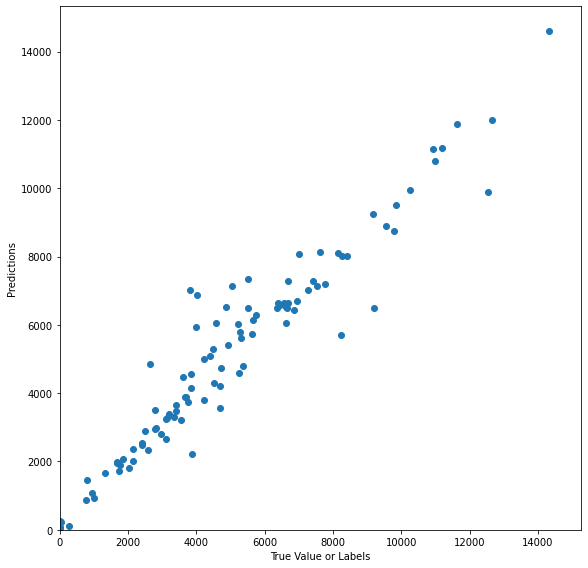

In [ ]:
result4['cluster_type'] = result4['cluster_type'].apply({'Cluster 0':0, 'Cluster 2':2, 'Cluster 3':3, 'Cluster 4':4, 'Cluster 1':1}.get)

trainDataset5 = result4.sample(frac=0.8, random_state=0) 
testDataset5 = result4.drop(trainDataset5.index)

rfr5 = RandomForestRegressor(n_estimators=50, criterion='squared_error', bootstrap=True)
rfr5.fit(trainDataset5.iloc[: , 2: -1], trainDataset5['E_opt(Wh)'])

pred5 = rfr5.predict(testDataset5.iloc[: , 2: -1])

error5 = mean_squared_error(testDataset5['E_opt(Wh)'], pred5)
print(error5)

predPlot(testDataset5['E_opt(Wh)'], pred5)

# Gradient Boosting

In [ ]:
error2 < error5

True

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
gbr = GradientBoostingRegressor(**params).fit(trainDataset5.iloc[: , 2: ], trainDataset5['E_opt(Wh)'] )
gbr.score(testDataset5.iloc[: , 2: ], testDataset5['E_opt(Wh)'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9261080034556888

In [ ]:
gbr2 = GradientBoostingRegressor(**params).fit(trainDataset2.iloc[: , 2:], trainDataset2['E_opt(Wh)'] )
gbr2.score(testDataset2.iloc[: , 2:], testDataset2['E_opt(Wh)'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9271419696458469

In [ ]:
score_1 = gbr.score(testDataset5.iloc[: , 2: ], testDataset5['E_opt(Wh)'])
score_2 = gbr2.score(testDataset2.iloc[: , 2:], testDataset2['E_opt(Wh)'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(f'''coefficient of determination of the predictions from Gradient Boosting Regrssor 
          with demand cluster types as feature: {round(score_1, 6)}''', end="\n\n\n")

print(f'''coefficient of determination of the predictions from Gradient Boosting Regrssor 
          with load - generation differences cluster types as feature: {round(score_2, 6)}''')

coefficient of determination of the predictions from Gradient Boosting Regrssor 
          with demand cluster types as feature: 0.926108


coefficient of determination of the predictions from Gradient Boosting Regrssor 
          with load - generation differences cluster types as feature: 0.927953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


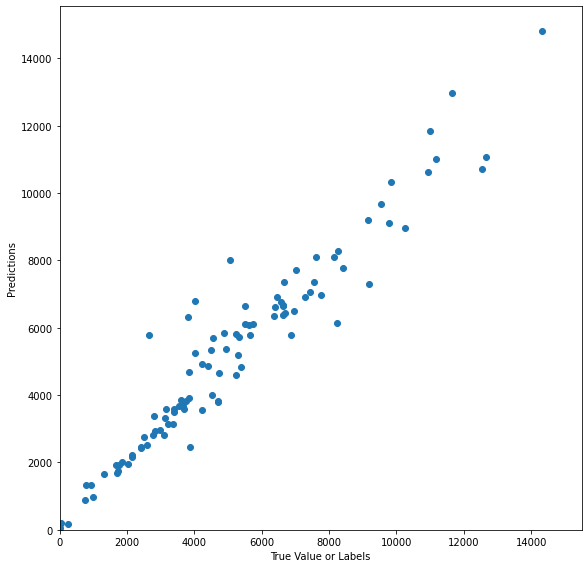

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


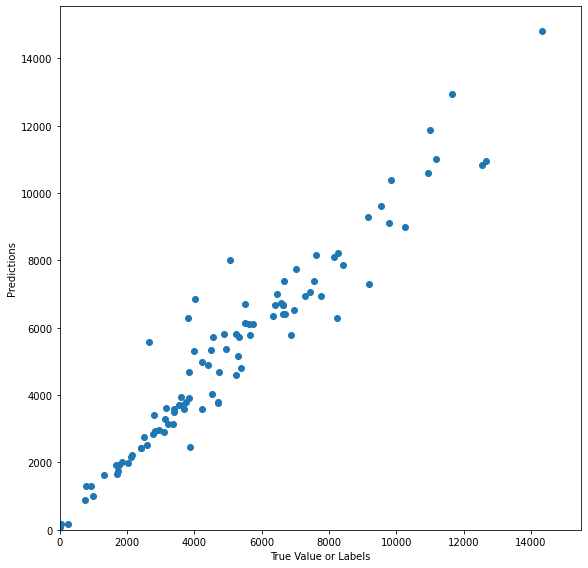

In [ ]:
predPlot(testDataset5['E_opt(Wh)'], gbr.predict(testDataset5.iloc[: , 2:]))
predPlot(testDataset2['E_opt(Wh)'], gbr2.predict(testDataset2.iloc[: , 2: ]))

In [ ]:
mse = mean_squared_error(testDataset5['E_opt(Wh)'], gbr.predict(testDataset5.iloc[: , 2:]))
mse2 = mean_squared_error(testDataset2['E_opt(Wh)'], gbr2.predict(testDataset2.iloc[: , 2: ]))
print(mse2, mse)
print(error2, error5)

690863.4688363441 708559.824900154
761848.1693307427 789335.8357447375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(f'''Mean Squared Error for Gradient Boosting Regrssor 
          with load - generation differences cluster types 
          and hourly averages of load - generation differences values as feature: {round(mse2, 6)}''', end="\n\n\n")

print(f'''Mean Squared Error for Random Forest Regrssor 
          with load - generation differences cluster types 
          and hourly averages of load - generation differences values as feature: {round(error2, 6)}''', end="\n\n\n")

print(f'''Mean Squared Error for Gradient Boosting Regrssor 
          with demand cluster types 
          and hourly averages of load - generation differences values as feature: {round(mse, 6)}''', end="\n\n\n")

print(f'''Mean Squared Error for Random Forest Regrssor 
          with demand cluster types 
          and hourly averages of load - generation differences values as feature: {round(error5, 6)}''')

Mean Squared Error for Gradient Boosting Regrssor 
          with load - generation differences cluster types 
          and hourly averages of load - generation differences values as feature: 690863.468836


Mean Squared Error for Random Forest Regrssor 
          with load - generation differences cluster types 
          and hourly averages of load - generation differences values as feature: 761848.169331


Mean Squared Error for Gradient Boosting Regrssor 
          with demand cluster types 
          and hourly averages of load - generation differences values as feature: 708559.8249


Mean Squared Error for Random Forest Regrssor 
          with demand cluster types 
          and hourly averages of load - generation differences values as feature: 789335.835745


In [ ]:
predAll2 = gbr2.predict(result4.iloc[: , 2:])

random_state = 42
autumnPreds2 = result4.copy()
autumnPreds2['E_opt(Wh)'] = (autumnPreds2['E_opt(Wh)']/1000).round(decimals=4)
autumnPreds2.rename(columns={'E_opt(Wh)' : 'computed_autumn_E_opt(KWh)'}, inplace=True)
autumnPreds2['pred_autumn_E_opt(KWh)'] = (predAll2/1000).round(decimals=4)

autumnPreds2.to_csv("autumnPreds2.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


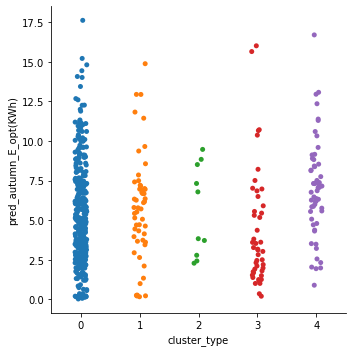

In [ ]:
sns.catplot(data=autumnPreds2, x='cluster_type', y='pred_autumn_E_opt(KWh)', hue='cluster_type')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


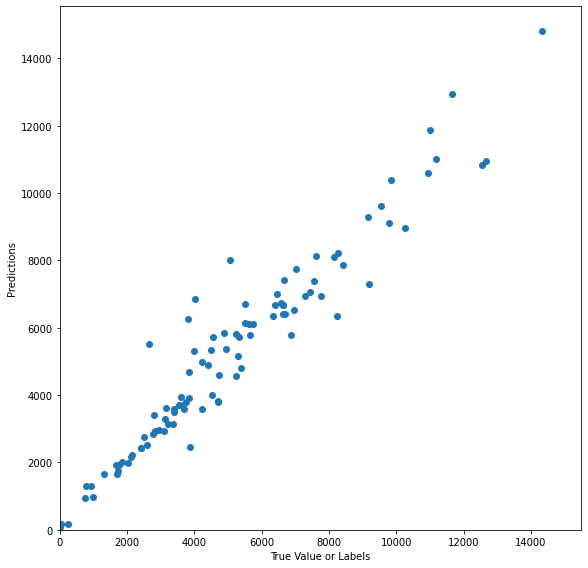

Error from GB Regressor: 690863.4688363441


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


site_id  computed_summer_E_opt(KWh)  cluster_type      cost_1     cost_2  \
0    327043                     14.1465             2  153.062034  13.155048   
1   6005316                      1.4481             2   -7.859114 -19.041952   
2  12054066                      2.1259             2  -43.832525 -79.024441   
3  19581418                      3.3890             2  -34.991104 -68.885198   
4  24931494                      3.6910             3   93.896885  28.371382   

   pred_summer_E_opt(KWh)  
0                 14.0723  
1                  1.5668  
2                  2.2860  
3                  3.2982  
4                  3.9262

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr2 = GradientBoostingRegressor(**params).fit(trainDataset2.iloc[: , 2:], trainDataset2['E_opt(Wh)'] )
gbr2.score(testDataset2.iloc[: , 2:], testDataset2['E_opt(Wh)'])

predPlot(testDataset2['E_opt(Wh)'], gbr2.predict(testDataset2.iloc[: , 2: ]))

mse2 = mean_squared_error(testDataset2['E_opt(Wh)'], gbr2.predict(testDataset2.iloc[: , 2: ]))

print(f'Error from GB Regressor: {mse2}')

predAll2 = gbr2.predict(result4.iloc[: , 2:])

random_state = 42
summerPreds2 = result3.copy()
summerPreds2['E_opt(Wh)'] = (summerPreds2['E_opt(Wh)']/1000).round(decimals=4)
summerPreds2.rename(columns={'E_opt(Wh)' : 'computed_summer_E_opt(KWh)'}, inplace=True)
summerPreds2['pred_summer_E_opt(KWh)'] = (predAll2/1000).round(decimals=4)

summerPreds2.to_csv("summerPreds2.csv", index=False)
summerPreds2.head()

